# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [ ]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [ ]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0xB4A5, 0xB4A5, 0xB4A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x54AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15B6, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34AE, 0x35AE, 0x35AE, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xB3A5, 0xB4A5, 0xB4A5, 0xD49D, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x54AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x34AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34AE, 0x14AE, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x14B6, 0x15B6, 0x14AE, 0x34B6, 0x34B6, 0x14B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xB4A5, 0xB4A5, 0xD4A5, 0xD49D, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF5AD, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x34AE, 0x35AE, 0x34AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x15B6, 0x35B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x15B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x14AE, 0x34AE, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xF4B5, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xB3A5, 0xB4A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15B6, 0x15B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34AE, 0x34AE, 0x34AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x35B6, 0x15B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x14AE, 0x34AE, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14AE, 0xB3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15B6, 0x15B6, 0x35AE, 0x35B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15AE, 0x35B6, 0x35B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14AE, 0xD4A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35B6, 0x15AE, 0x35AE, 0x15B6, 0x14AE, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15AE, 0x35AE, 0x15B6, 0x15B6, 0x15B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0xF4AD, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x15B6, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x15AE, 0x35B6, 0x15AE, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x15B6, 0x15B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF3A5, 0xF3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0xF5AD, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15AE, 0x14AE, 0x14AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x35B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0xF4B5, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x14A6, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x15B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x34B6, 0x15B6, 0x14B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0xF4AD, 0x14A6, 0x14A6, 0x14A6, 0x14AE, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x15B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35AE, 0x15B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15AE, 0x34AE, 0x35AE, 0x34AE, 0x14AE, 0x14AE, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x34B6, 0x14AE, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4A5, 0xD4A5, 0xB4A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0xF4A5, 0x14A6, 0x14A6, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34AE, 0x34B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x34AE, 0x34AE, 0x14AE, 0x14B6, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0x14A6, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0xF4AD, 0x14A6, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15B6, 0x35AE, 0x55B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x34AE, 0x34AE, 0x34B6, 0x35B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF5AD, 0xF5AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15B6, 0x15B6, 0x14AE, 0x34AE, 0x34AE, 0x34AE, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55AE, 0x35AE, 0x34B6, 0x15B6, 0x35B6, 0x15AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x34AE, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x34B6, 0x14AE, 0x34B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0x14A6, 0x14A6, 0x14A6, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35B6, 0x35AE, 0x15B6, 0x15AE, 0x34AE, 0x34AE, 0x34B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x34B6, 0x14B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x34AE, 0x34AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0x14A6, 0x14A6, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0xF5AD, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x15B6, 0x14B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x34AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14A6, 0x14AE, 0x15AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14A6, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x14B6, 0x14B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD3A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF5AD, 0xF4AD, 0x14AE, 0xF4AD, 0x14AE, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0xD3A5, 0xD3A5, 0xD4A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF5AD, 0xF4AD, 0x15AE, 0x15AE, 0x14AE, 0x34AE, 0x14AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x14B6, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x15AE, 0x14AE, 0x34AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x34AE, 0x34B6, 0x14AE, 0x14AE, 0x34AE, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xF4A5, 0xF4A5, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14A6, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x34AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x15B6, 0xF4B5, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x34AE, 0x34B6, 0x14AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4AD, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x34AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x35AE, 0x35AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x34AE, 0x34B6, 0x14AE, 0xF4AD, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35AE, 0x35AE, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34B6, 0x34AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x34B6, 0x34AE, 0x34AE, 0x14AE, 0x14B6, 0xF4AD, 0xF4AD, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xD4AD, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x14AE, 0x35AE, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x14AE, 0x14B6, 0x14B6, 0xF4AD, 0xF4AD, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x34AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0x14AE, 0xF5AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x35B6, 0x34B6, 0x35B6, 0x15B6, 0x15B6, 0x35B6, 0x15B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0x35B6, 0x34B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0xF5AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x35B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x34B6, 0x34AE, 0x34AE, 0x34AE, 0x14AE, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x15B6, 0x34B6, 0x35B6, 0x35B6, 0x34B6, 0x34AE, 0x34B6, 0x35B6, 0x35B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34AE, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF5AD, 0x15AE, 0x15AE, 0x14AE, 0xF5AD, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x15B6, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14AE, 0x14AE, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4AD, 0xD4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x34AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x34B6, 0x14B6, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4AD, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0xF5AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x15B6, 0x15B6, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0x14AE, 0xF4A5, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x15B6, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x35AE, 0x15AE, 0x15B6, 0x15B6, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x36B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x14B6, 0x14B6, 0x34B6, 0x35B6, 0x15B6, 0x15B6, 0x14AE, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF5AD, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35AE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x15B6, 0x14B6, 0x14B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF5AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x15B6, 0x14B6, 0x34B6, 0x34B6, 0x35B6, 0x15B6, 0x15B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF5AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x35AE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x34B6, 0x14B6, 0x34B6, 0x15B6, 0x15B6, 0x15B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x14B6, 0x15B6, 0x15B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0x14AE, 0xF5AD, 0x15AE, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x35B6, 0x35B6, 0x35AE, 0x54B6, 0x35B6, 0x34B6, 0x14B6, 0x14B6, 0x15B6, 0x15B6, 0x14B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0x14A6, 0x14A6, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0xF5AD, 0x15AE, 0x15A6, 0x15A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x36B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x56B6, 0x56B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14AE, 0xF4A5, 0xF4A5, 0xD4A5, 0xB4A5, 0xB3A5, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x36B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x36B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x34B6, 0x34B6, 0x34B6, 0x34AE, 0x34AE, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x14B6, 0x15B6, 0x14AE, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4AD, 0xF4AD, 0xD3AD, 0xD4AD, 0xD4AD, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF5AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14A6, 0x14A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x35B6, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x36B6, 0x35B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x34B6, 0x35B6, 0x34B6, 0x34AE, 0x34AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x14B6, 0x14AE, 0xF4A5, 0xF4A5, 0xD4A5, 0xD3A5, 0xD4A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4AD, 0xD4AD, 0xD4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x34AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x36B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x36B6, 0x56B6, 0x56B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x56B6, 0x36B6, 0x55B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x56B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x34B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x14B6, 0x34B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x56B6, 0x36B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x35B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x36B6, 0x36B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0xB3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0xF5AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15B6, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x35B6, 0x35B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x35B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x36B6, 0x36B6, 0x35B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x36B6, 0x36B6, 0x36B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0x34B6, 0x35B6, 0x34B6, 0x34B6, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x36B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x36B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0xD3A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xD4AD, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35AE, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0xD3A5, 0xD4A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x36B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x54B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15B6, 0x15B6, 0x35B6, 0x34B6, 0xD49D, 0xB4A5, 0xD4A5, 0xD3A5, 0xD4A5, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x36B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0xB39D, 0xB4A5, 0xD4A5, 0xB3A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xD49D, 0xB4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x56B6, 0x36B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x36B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0xB4A5, 0x949D, 0xB4A5, 0xB39D, 0xB39D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0x15AE, 0x14A6, 0x14AE, 0x14AE, 0x14A6, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x56B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x36B6, 0x56B6, 0x36B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0xB3A5, 0xB4A5, 0x939D, 0x93A5, 0xB3A5, 0xB49D, 0xB4A5, 0xB4A5, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4AD, 0xF4AD, 0xD4AD, 0x14AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x36B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x56B6, 0x56B6, 0x36B6, 0x35B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x76B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x34B6, 0xB39D, 0x94A5, 0x949D, 0xB3A5, 0xB39D, 0xB49D, 0xB4A5, 0xB4A5, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5AD, 0xF5AD, 0xF5A5, 0xF5A5, 0x14A6, 0x14A6, 0xF4A5, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x56B6, 0x55B6, 0x35B6, 0x36B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x34B6, 0x35B6, 0xB3A5, 0xB49D, 0xB49D, 0xB39D, 0xB39D, 0xB39D, 0x94A5, 0xB4A5, 0x94A5, 0x94A5, 0x94A5, 0xB4A5, 0xB4A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xB4A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0xB3A5, 0xB39D, 0xB39D, 0xB39D, 0xB3A5, 0xB3A5, 0xB4A5, 0x94A5, 0x94A5, 0x94A5, 0x94A5, 0xB4A5, 0xB49D, 0xB39D, 0xB4A5, 0xB4A5, 0xD4A5, 0xB4A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4AD, 0xF5AD, 0xF4A5, 0xF4A5, 0x14A6, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x35B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x36B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x76B6, 0x56B6, 0x56B6, 0x75B6, 0x55B6, 0x35AE, 0x55AE, 0x56B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0x94A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB3A5, 0xD3A5, 0xB3A5, 0xD3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x56AE, 0x56B6, 0x55B6, 0x55B6, 0x56BE, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB3A5, 0x94A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB3A5, 0xB4A5, 0xB3A5, 0xB3A5, 0xD3A5, 0xB3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0x14A6, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x75B6, 0x75B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x75B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x75B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x94A5, 0xB49D, 0xB39D, 0xB39D, 0xB39D, 0xB3A5, 0x94A5, 0x949D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB39D, 0xB3A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0x14AE, 0x14AE, 0xF5AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56BE, 0x56B6, 0x76B6, 0x76B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x94A5, 0xB3A5, 0xB49D, 0xB39D, 0xB39D, 0xB49D, 0xB49D, 0x949D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB39D, 0xD3A5, 0xD4A5, 0xD3A5, 0xB3A5, 0xD3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x56B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x75B6, 0x75B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0xB3A5, 0xB3A5, 0xB39D, 0xB39D, 0xB39D, 0xB49D, 0xB39D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB39D, 0xD39D, 0xD3A5, 0xD3A5, 0xD3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x34AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x76B6, 0x76B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0xB3A5, 0xB3A5, 0xB3A5, 0xB39D, 0xB39D, 0xB49D, 0xB4A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD3A5, 0xD39D, 0xD39D, 0xD39D, 0xD3A5, 0xD3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x55B6, 0x55B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x75B6, 0x75B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x76B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD39D, 0xD39D, 0xD3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x15AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x55B6, 0x55B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x76B6, 0x76B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0xB39D, 0xB4A5, 0xB39D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD3A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF5AD, 0xD4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0x15A6, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4AD, 0xF4A5, 0xF4A5, 0x15A6, 0x14A6, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x36B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56BE, 0x56B6, 0x36B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0xB3A5, 0x939D, 0xB49D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0x14AE, 0xF4AD, 0xF4AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55BE, 0x55BE, 0x56B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0xB39D, 0xB39D, 0x939D, 0x939D, 0xB39D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4AD, 0xD4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0x14A6, 0x14AE, 0x14AE, 0xF4AD, 0x15AE, 0xF5AD, 0xF5AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x36B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x939D, 0xB39D, 0xB3A5, 0xD4A5, 0xB49D, 0xB39D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0x14A6, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4A5, 0x14A6, 0x14A6, 0xF4A5, 0xF4AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x15AE, 0xF5AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x36B6, 0x56B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x76B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x93A5, 0x93A5, 0xB3A5, 0xB3A5, 0xD3A5, 0xD3A5, 0xB4A5, 0xB49D, 0xB4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0x14AE, 0x14AE, 0xF4AD, 0xF5A5, 0xF4AD, 0xF4AD, 0xF4A5, 0xF5A5, 0x14AE, 0xF4AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5A5, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x15AE, 0x15AE, 0xF4A5, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x949D, 0x93A5, 0xB39D, 0xD39D, 0xD3A5, 0xD3A5, 0xB4A5, 0xB49D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xB49D, 0xB3A5, 0xD3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x15AE, 0x14AE, 0x14AE, 0xF5AD, 0xF5AD, 0xF5AD, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF5AD, 0xF4A5, 0xF5A5, 0x15AE, 0xF5AD, 0xF4AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x75B6, 0x75B6, 0x55B6, 0x56B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x75B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0xB4A5, 0xB4A5, 0xB39D, 0xB3A5, 0xD3A5, 0xD3A5, 0xB4A5, 0xB49D, 0xB49D, 0xD3A5, 0xD4A5, 0xD4A5, 0xD49D, 0xB4A5, 0xB39D, 0xB3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0xF4A5, 0x14AE, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF5A5, 0xF4AD, 0xF4AD, 0xF4AD, 0xF5AD, 0xF5AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF5A5, 0x15AE, 0x14AE, 0x14AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76BE, 0x76BE, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x76B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x94A5, 0xB4A5, 0xB39D, 0xD3A5, 0xD3A5, 0xD3A5, 0xD49D, 0xB49D, 0xD39D, 0xD3A5, 0xD3A5, 0xD4A5, 0xD49D, 0xB49D, 0xB4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0x14A6, 0x14A6, 0x14A6, 0xF5A5, 0xF5A5, 0xF5AD, 0xF5AD, 0x15AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0x15AE, 0x15A6, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x36B6, 0x36B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55BE, 0x35B6, 0x56B6, 0x56BE, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x94A5, 0xB49D, 0xB39D, 0xB3A5, 0xD3A5, 0xD39D, 0xB49D, 0xB49D, 0xB49D, 0xD39D, 0xD39D, 0xD4A5, 0xB4A5, 0xB49D, 0xB3A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4AD, 0xF4A5, 0x14A6, 0x14A6, 0x14AE, 0xF5AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0xF4A5, 0xF4A5, 0x14AE, 0xF4AD, 0xF5AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x76B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x939D, 0x939D, 0xB3A5, 0xB3A5, 0xB3A5, 0xB39D, 0xB49D, 0xB49D, 0xB49D, 0xB39D, 0xD39D, 0xD39D, 0xB39D, 0xB3A5, 0xB3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0xF4A5, 0x14A6, 0x14A6, 0x14A6, 0x15AE, 0x15AE, 0xF5AD, 0xF5AD, 0x15AE, 0xF5AD, 0x15A6, 0xF4A5, 0x14AE, 0x14AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x75B6, 0x55B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x949D, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB39D, 0xB4A5, 0xB4A5, 0xB4A5, 0xB4A5, 0xD3A5, 0xB3A5, 0xB3A5, 0xB4A5, 0xB3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4AD, 0xF4AD, 0x14AE, 0xF4A5, 0x14A6, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x14A6, 0x14A6, 0x14A6, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x36B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x56B6, 0x56B6, 0x56B6, 0x56B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x54B6, 0x55B6, 0x93A5, 0x939D, 0xB39D, 0xB39D, 0xB49D, 0xB39D, 0xB39D, 0xB3A5, 0xB4A5, 0xB3A5, 0xB3A5, 0xB3A5, 0xB3A5, 0xB4A5, 0xB3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xB4A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF5AD, 0xF5AD, 0x15AE, 0x15A6, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0xF5AD, 0xF5AD, 0x15AE, 0x15A6, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x36B6, 0x36B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35BE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x54B6, 0x55B6, 0xB49D, 0xB39D, 0xB39D, 0xD4A5, 0xD49D, 0xD4A5, 0xD49D, 0xB49D, 0xB49D, 0xB4A5, 0xB4A5, 0xB39D, 0xB4A5, 0xB49D, 0xB3A5, 0xB4A5, 0xB4A5, 0xB3A5, 0xB4A5, 0xD4A5, 0xD4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF5A5, 0xF5A5, 0xF5A5, 0xF4A5, 0xF4A5, 0x15A6, 0x15AE, 0x15A6, 0x15A6, 0x14A6, 0x14A6, 0x15AE, 0xF5AD, 0x15AE, 0xF5AD, 0x15A6, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0xF4AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x56B6, 0x76B6, 0x55B6, 0x55B6, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0xF3A5, 0xF4A5, 0xB49D, 0xD3A5, 0xF4A5, 0xF3A5, 0xF4A5, 0x14A6, 0xF4A5, 0xD4A5, 0xD3A5, 0x14A6, 0x14A6, 0xF4A5, 0xD3A5, 0xD3A5, 0xD3A5, 0xD4A5, 0xD4A5, 0xF4AD, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x15A6, 0xF4A5, 0xF5A5, 0x15A6, 0xF4A5, 0xF4A5, 0x14A6, 0x15AE, 0x15A6, 0x15A6, 0x14A6, 0x14A6, 0x14AE, 0x15AE, 0x15AE, 0x15A6, 0x15AE, 0x14A6, 0x14A6, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0xF5AD, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0xF4AD, 0xF5AD, 0xF5AD, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x15AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x54B6, 0x55B6, 0xD39D, 0xF39D, 0xF39D, 0xD39D, 0xD39D, 0xB39D, 0xB39D, 0xD39D, 0xD39D, 0xF3A5, 0xF49D, 0xF4A5, 0xF4A5, 0xD39D, 0xF3A5, 0xD39D, 0xD39D, 0xF4A5, 0xF4A5, 0x34A6, 0x35A6, 0x55A6, 0x35A6, 0x55A6, 0x55A6, 0x35A6, 0x15A6, 0x35AE, 0x15AE, 0x15A6, 0x15A6, 0x35AE, 0x15A6, 0x15A6, 0x15A6, 0x15A6, 0x15A6, 0xF4A5, 0x15A6, 0x15A6, 0xF5A5, 0xF5A5, 0x15A6, 0xF4A5, 0x14A6, 0x14A6, 0x15A6, 0x15A6, 0x15A6, 0x14AE, 0x14A6, 0x14A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35AE, 0x55AE, 0x55AE, 0x35AE, 0x55AE, 0x35AE, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x55B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x55B6, 0x35B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x15B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0xEF84, 0xEF84, 0xF85, 0x3085, 0x1085, 0x1085, 0x108D, 0x108D, 0x108D, 0x318D, 0x318D, 0x318D, 0x1185, 0x518D, 0x7195, 0x9295, 0x9295, 0x9295, 0x9395, 0xD295, 0xD395, 0xB395, 0xB395, 0xF39D, 0xF49D, 0x14A6, 0xF4A5, 0xD49D, 0xF4A5, 0xF4A5, 0xD4A5, 0xF4A5, 0x14A6, 0x35AE, 0x35A6, 0x15A6, 0x15A6, 0x15A6, 0x14AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35AE, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x55B6, 0x55B6, 0x35B6, 0x35B6, 0x35B6, 0x14B6, 0x14B6, 0x34B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x35B6, 0x34B6, 0x34B6, 0x6A5B, 0x6A5B, 0x495B, 0x695B, 0x8A63, 0x8B63, 0xAB6B, 0xAB6B, 0xCB6B, 0xC6C, 0x2D6C, 0x2D6C, 0x4D74, 0xAE74, 0xAF7C, 0xCF7C, 0xF07C, 0xF07C, 0x107D, 0x3085, 0x3185, 0x7185, 0x5185, 0x728D, 0x918D, 0x9295, 0x9295, 0x9395, 0x9395, 0xB395, 0xB39D, 0xB395, 0xB395, 0xD39D, 0xB39D, 0xB49D, 0xD49D, 0xF4A5, 0xF5A5, 0xF49D, 0x15A6, 0x15A6, 0x15A6, 0x14A6, 0x15A6, 0x35A6, 0x55AE, 0x55AE, 0x15A6, 0xF4A5, 0x14A6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15A6, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15A6, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x55B6, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x35B6, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x55AE, 0x55AE, 0x35AE, 0x55B6, 0x35B6, 0x35B6, 0x34B6, 0x35B6, 0x15AE, 0x34AE, 0x34AE, 0x34AE, 0x35AE, 0x15B6, 0x15B6, 0x15B6, 0x35AE, 0x35AE, 0x34B6, 0x34B6, 0xE639, 0xE531, 0xE531, 0xE539, 0xC539, 0xC539, 0xE539, 0x63A, 0x4642, 0x6742, 0x8842, 0x8842, 0xC84A, 0xA942, 0xA94A, 0xE952, 0xA53, 0x2A53, 0x6B53, 0xCB5B, 0xCC5B, 0xEC63, 0x2D6C, 0x2E6C, 0x6E74, 0x8F74, 0xAF7C, 0x1085, 0x318D, 0x3185, 0x318D, 0x718D, 0x528D, 0x318D, 0x328D, 0x7395, 0x939D, 0xB39D, 0xB39D, 0xB49D, 0x949D, 0xB39D, 0xD49D, 0xD49D, 0xF4A5, 0x14A6, 0xF4A5, 0xD49D, 0xF4A5, 0x15A6, 0x14A6, 0x14A6, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x55AE, 0x55AE, 0x35AE, 0x55AE, 0x55AE, 0x35AE, 0x34AE, 0x34AE, 0x35AE, 0x35AE, 0x15AE, 0x14AE, 0x14AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0x35B6, 0x35AE, 0x35AE, 0x35B6, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x34AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15B6, 0x35B6, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x35AE, 0x34B6, 0x15AE, 0x14AE, 0x35AE, 0x35AE, 0x34AE, 0x14AE, 0x14AE, 0x34B6, 0x14B6, 0x14B6, 0x14B6, 0x14B6, 0x15B6, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34B6, 0x14B6, 0x14AE, 0x14AE, 0x34B6, 0x34B6, 0x8429, 0x6429, 0x8429, 0xA429, 0x8431, 0x6531, 0x8531, 0x8529, 0x8529, 0x6429, 0x6429, 0x6421, 0x6421, 0x6529, 0x6429, 0x8529, 0x6529, 0x6421, 0x8521, 0xC529, 0xC631, 0x632, 0x63A, 0x4742, 0xA752, 0xE952, 0x4A5B, 0x6A5B, 0xAB63, 0xEC63, 0xD6C, 0x4D74, 0x4E74, 0x6E74, 0x8F7C, 0xD07C, 0xD084, 0xD084, 0xF084, 0x1185, 0x518D, 0x518D, 0x728D, 0x728D, 0x538D, 0x528D, 0x7295, 0x9295, 0xB39D, 0xD39D, 0xB395, 0xB39D, 0xD49D, 0xB49D, 0xB39D, 0xD4A5, 0xD49D, 0xD49D, 0xF4A5, 0xF4A5, 0x15A6, 0x15A6, 0x15A6, 0xF5A5, 0xF4A5, 0x14A6, 0x15AE, 0x15AE, 0x15A6, 0x15AE, 0x35AE, 0x35AE, 0x35A6, 0x15A6, 0x15A6, 0x15A6, 0x55AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15A6, 0x15A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14B6, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x35AE, 0x14AE, 0xC431, 0xC531, 0xA531, 0xA431, 0xC539, 0xC539, 0xC539, 0xA431, 0xA431, 0xC431, 0xC531, 0xE531, 0xE531, 0xC429, 0xC431, 0xA429, 0xA429, 0x8429, 0x6329, 0x4321, 0x4321, 0x6429, 0x6429, 0x6429, 0x8431, 0x8431, 0xC531, 0xE539, 0x63A, 0x263A, 0x6842, 0xA842, 0xE94A, 0xA4B, 0xA53, 0x6B5B, 0x8C5B, 0xCC63, 0xED63, 0xD6C, 0x6E74, 0xAF74, 0xAF74, 0xB07C, 0xD07C, 0xD07C, 0xF084, 0x1085, 0x518D, 0x728D, 0x728D, 0x7295, 0x5295, 0x5395, 0x7295, 0x7295, 0x9395, 0x9395, 0x9395, 0x9395, 0xB39D, 0xD39D, 0xD4A5, 0xD4A5, 0xB39D, 0xB3A5, 0xB4A5, 0xD4A5, 0xF4A5, 0xF4A5, 0xF4A5, 0x14A6, 0x14A6, 0x14A6, 0x55AE, 0x55AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35B6, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x34AE, 0x35AE, 0x35AE, 0x35AE, 0x15B6, 0x15B6, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xC531, 0xC531, 0xC531, 0xC531, 0xE531, 0xE531, 0xE531, 0xE531, 0xE531, 0xE531, 0x532, 0xE531, 0x532, 0x532, 0x52A, 0x532, 0xE531, 0xC531, 0xE531, 0xE531, 0xC529, 0xE629, 0x632, 0xC631, 0xC631, 0xC631, 0xC731, 0xC631, 0x8629, 0x6629, 0xA629, 0xE731, 0x2732, 0x2732, 0x2832, 0x693A, 0x8942, 0xC942, 0xE94A, 0xEA4A, 0x2A53, 0x4B53, 0x6B5B, 0xAB63, 0xCD63, 0xD6C, 0xE6C, 0x2D6C, 0x4E6C, 0x8F74, 0xD07C, 0xB07C, 0xB07C, 0xD184, 0xF084, 0xF184, 0x518D, 0x328D, 0x3285, 0x3285, 0x328D, 0x328D, 0x528D, 0x9295, 0xB39D, 0x9395, 0x7295, 0x9395, 0xB49D, 0xB395, 0xB39D, 0xD49D, 0xF39D, 0xF49D, 0xF49D, 0xD49D, 0xD49D, 0xF4A5, 0xF4A5, 0x14A6, 0x35A6, 0x15A6, 0x15A6, 0x35AE, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x36AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0xC531, 0xA531, 0xC531, 0xC531, 0xC531, 0xE531, 0xE429, 0xE431, 0xE531, 0xE531, 0xE531, 0xE531, 0xE529, 0x532, 0x532, 0x532, 0xE531, 0xE531, 0xE631, 0x632, 0x4632, 0x673A, 0x4732, 0x2732, 0x473A, 0x473A, 0x473A, 0x283A, 0x273A, 0x473A, 0x273A, 0x73A, 0x632, 0xE631, 0x63A, 0x632, 0xC631, 0xE531, 0xE631, 0x632, 0x463A, 0x683A, 0x683A, 0xA842, 0xA942, 0xC942, 0xA4B, 0x6A53, 0x4B53, 0xA53, 0x4B53, 0x8C5B, 0xAD63, 0xAD63, 0xED63, 0xE6C, 0x2E6C, 0x2E6C, 0x4F6C, 0x6F74, 0x8F74, 0x6F74, 0x907C, 0xD084, 0xF084, 0xF17C, 0x1185, 0xF184, 0xF084, 0xF184, 0x318D, 0x1185, 0x1185, 0x3185, 0x1185, 0x328D, 0x328D, 0x7295, 0x7395, 0x5295, 0x7295, 0xB39D, 0xB49D, 0x739D, 0x939D, 0xD4A5, 0xF4A5, 0xF4A5, 0x14A6, 0x34A6, 0x14A6, 0x35A6, 0x35AE, 0x35AE, 0x35AE, 0x36AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35B6, 0x35AE, 0x35AE, 0x35AE, 0x35B6, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x34AE, 0x34AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x15AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x34AE, 0x15AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xC529, 0xC529, 0xC529, 0xC529, 0xE529, 0xE529, 0xE529, 0xE429, 0xE429, 0xE529, 0xE531, 0xE529, 0xE529, 0xE529, 0xE529, 0xE531, 0x632, 0x253A, 0x253A, 0x473A, 0x4732, 0x673A, 0x883A, 0xA842, 0xA842, 0x683A, 0x483A, 0x483A, 0x483A, 0x473A, 0x473A, 0x483A, 0x473A, 0x483A, 0x2832, 0xE731, 0xE631, 0x732, 0xE729, 0xE629, 0xE629, 0xC629, 0x732, 0x732, 0x2832, 0x2832, 0x2832, 0x683A, 0xA842, 0x893A, 0xAA42, 0xEA42, 0xEA4A, 0xCA4A, 0x2A4B, 0x6B53, 0x6B53, 0x6C5B, 0x8C5B, 0xAD5B, 0xCD5B, 0xED5B, 0xD64, 0xE64, 0xE64, 0x2E6C, 0x2E6C, 0x2E64, 0x2E6C, 0x4E6C, 0x2F6C, 0x2E6C, 0x6F74, 0x8F74, 0xD07C, 0xB074, 0xB07C, 0xF184, 0x1185, 0x1185, 0x1185, 0x328D, 0x728D, 0x728D, 0x528D, 0x7295, 0xB395, 0xD49D, 0xD495, 0xB495, 0xF49D, 0xF49D, 0x14A6, 0xF4A5, 0xD5A5, 0xF4A5, 0x35A6, 0x55A6, 0x55AE, 0x76AE, 0x76AE, 0x76AE, 0x76AE, 0x76AE, 0x56AE, 0x36AE, 0x35AE, 0x36AE, 0x36AE, 0x56AE, 0x56AE, 0x56AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x55AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35B6, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x34AE, 0x34AE, 0x34AE, 0x34AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0xF5AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0xC429, 0xC429, 0xC529, 0xC529, 0xC429, 0xC429, 0xC429, 0xC429, 0xE429, 0xE429, 0xE431, 0xC531, 0xC531, 0xE529, 0xE531, 0xE531, 0xE631, 0x632, 0xA742, 0xC83A, 0xA83A, 0xC842, 0xA93A, 0xC942, 0x893A, 0x883A, 0x483A, 0x683A, 0x883A, 0x883A, 0x683A, 0x683A, 0x683A, 0x483A, 0x473A, 0x683A, 0x673A, 0x273A, 0x2732, 0x4732, 0x4732, 0x4732, 0x2732, 0xC629, 0xE629, 0xE629, 0xE631, 0xE529, 0xE631, 0x2732, 0x2732, 0x2732, 0x473A, 0x4832, 0x2732, 0x883A, 0x8842, 0xA842, 0xC94A, 0xC942, 0xE94A, 0xEA42, 0xA4B, 0xA4B, 0xA53, 0x6B53, 0x8C53, 0xAC53, 0xCC5B, 0xCC5B, 0xCD63, 0xAD63, 0xAC63, 0xEC5B, 0xED63, 0xED63, 0xD64, 0x2E6C, 0x2E6C, 0x6F6C, 0x6F74, 0x4F74, 0x9074, 0xB07C, 0xD17C, 0x1085, 0x1085, 0x5185, 0x728D, 0x528D, 0x528D, 0x528D, 0x5295, 0x9395, 0x7395, 0x939D, 0xD39D, 0xD49D, 0xF49D, 0x149E, 0xF49D, 0xD49D, 0xD4A5, 0xF4A5, 0xF5A5, 0xF4A5, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35A6, 0x15A6, 0x35AE, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x56AE, 0x55AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xF4AD, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0xC529, 0xC529, 0xC529, 0xA429, 0xC429, 0xC529, 0xA429, 0xC529, 0xC429, 0xC429, 0xC429, 0xC429, 0xC529, 0xE529, 0xE529, 0x532, 0x632, 0x453A, 0xC842, 0xC83A, 0xC842, 0xA93A, 0xA93A, 0xA93A, 0xA93A, 0x883A, 0xA842, 0xA83A, 0x883A, 0x883A, 0x683A, 0x683A, 0x683A, 0x683A, 0x473A, 0x673A, 0x473A, 0x473A, 0x473A, 0x6832, 0x6732, 0x4732, 0x2732, 0x4732, 0x272A, 0x2732, 0x4732, 0x2732, 0x732, 0x72A, 0xE729, 0xE629, 0xE629, 0x62A, 0x72A, 0xE729, 0xE629, 0x732, 0x732, 0xE731, 0x732, 0x732, 0x473A, 0x6842, 0xA942, 0xC942, 0xEA42, 0xEA42, 0xEA42, 0xA4B, 0x2A4B, 0x2A4B, 0xA4B, 0x2A43, 0x8B4B, 0x8C53, 0x6C4B, 0x6B53, 0x6C53, 0xAD5B, 0xAD5B, 0xCD5B, 0xEE63, 0xE64, 0x2E6C, 0x4E6C, 0x4F6C, 0x4F6C, 0x6F6C, 0x9074, 0x9074, 0x6F7C, 0x907C, 0xD184, 0x118D, 0x1185, 0x1185, 0x318D, 0x328D, 0x528D, 0x728D, 0x7295, 0x7295, 0x9395, 0xB395, 0xB39D, 0xB39D, 0xB49D, 0xB49D, 0xF4A5, 0xF4A5, 0x14A6, 0x35A6, 0x35A6, 0x55AE, 0x55AE, 0x15A6, 0x35A6, 0x55AE, 0x55AE, 0x56AE, 0x56AE, 0x55AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x34AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15B6, 0xF5B5, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0xF4AD, 0x14AE, 0xA429, 0xA429, 0xA429, 0xA429, 0xC429, 0xC529, 0xC529, 0xC529, 0xC429, 0xC429, 0xC431, 0xC529, 0xC429, 0xC529, 0xE529, 0xE531, 0x453A, 0x883A, 0xA83A, 0xA83A, 0xA93A, 0xC93A, 0xA93A, 0xC93A, 0xA942, 0xA942, 0xA93A, 0xA83A, 0xA83A, 0x883A, 0x883A, 0x883A, 0x883A, 0x683A, 0x683A, 0x683A, 0x483A, 0x483A, 0x683A, 0x6832, 0x6832, 0x6732, 0x6732, 0xA832, 0xA83A, 0x8832, 0x6732, 0x673A, 0x673A, 0x683A, 0x473A, 0x2732, 0x2732, 0x4732, 0x473A, 0x2732, 0x2732, 0x2732, 0x732, 0xE631, 0xE631, 0xC631, 0xE631, 0x632, 0x263A, 0x473A, 0x2732, 0x2732, 0x473A, 0x683A, 0x683A, 0x883A, 0x883A, 0xA83A, 0xC942, 0xC942, 0xC942, 0xEA42, 0xA4B, 0x2B53, 0x4B4B, 0x6B4B, 0x8C53, 0x6C53, 0xEC63, 0xEC63, 0xCD63, 0xCD63, 0xED63, 0xAD5B, 0xED63, 0xE6C, 0xE6C, 0xE6C, 0x4E74, 0x6F74, 0x6F74, 0x6F74, 0x6F7C, 0x907C, 0xD084, 0xF084, 0xF184, 0x1185, 0x1185, 0x318D, 0x318D, 0x5295, 0x5295, 0x9295, 0xB39D, 0xB39D, 0xB39D, 0xD49D, 0xD39D, 0xF4A5, 0x14A6, 0xF4A5, 0x15A6, 0x35AE, 0x35A6, 0x55AE, 0x75AE, 0x75AE, 0x55AE, 0x55AE, 0x75B6, 0x75B6, 0x56B6, 0x55AE, 0x55AE, 0x55AE, 0x35AE, 0x15AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x35AE, 0x15AE, 0x35AE, 0x34AE, 0x34AE, 0x35AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15B6, 0x15B6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0xA429, 0xA429, 0xA529, 0xA529, 0xA429, 0xA529, 0xC529, 0xC529, 0xC429, 0xC429, 0xC429, 0xC429, 0xC429, 0xC529, 0xC529, 0xE531, 0x253A, 0x873A, 0x883A, 0x883A, 0xC83A, 0xA93A, 0xA93A, 0x883A, 0xA842, 0xA942, 0x883A, 0x883A, 0x883A, 0x883A, 0x683A, 0x673A, 0x683A, 0x483A, 0x473A, 0x473A, 0x483A, 0x483A, 0x6832, 0x6832, 0x683A, 0x683A, 0x6732, 0x8732, 0x6732, 0x6732, 0x673A, 0x683A, 0x483A, 0x883A, 0x883A, 0xA83A, 0xA83A, 0x6832, 0x673A, 0x673A, 0x6832, 0x4832, 0x2732, 0x2732, 0x2732, 0xE731, 0xE631, 0xE629, 0xE629, 0xE629, 0xE629, 0xE629, 0xC629, 0xE631, 0x632, 0x732, 0x2732, 0x4732, 0x732, 0x2732, 0x2832, 0x483A, 0x893A, 0x8942, 0xA93A, 0xA93A, 0xA942, 0xA93A, 0x4A4B, 0x4B53, 0x6B53, 0x8C53, 0x6C53, 0x8C53, 0x8C5B, 0x8D5B, 0xAD5B, 0x8D5B, 0xAD5B, 0xAD53, 0xAD5B, 0xAC5B, 0x8D5B, 0xAD63, 0xCD63, 0xAD63, 0xCD63, 0xCD63, 0xED6B, 0x2E6C, 0x2F74, 0x6F74, 0x4F74, 0x8F7C, 0xD084, 0xD084, 0xD084, 0xF084, 0xF084, 0xF18C, 0x318D, 0x5195, 0x9295, 0x9395, 0x7295, 0xB395, 0xF39D, 0xD39D, 0xD39D, 0xF4A5, 0x14A6, 0x34A6, 0x14A6, 0x15A6, 0x35A6, 0x56AE, 0x76AE, 0x76AE, 0x76AE, 0x56AE, 0x35AE, 0x35AE, 0x35AE, 0x56AE, 0x35AE, 0x35AE, 0x35AE, 0x35A6, 0x35A6, 0x15A6, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x8429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xC429, 0xC429, 0xC429, 0xC529, 0xC529, 0xC529, 0xC529, 0xE539, 0x2632, 0xA83A, 0xC93A, 0xA93A, 0xA93A, 0xC93A, 0xC93A, 0xA43, 0xEA42, 0xA942, 0x893A, 0x883A, 0xA83A, 0x883A, 0x683A, 0x683A, 0x683A, 0x683A, 0x4832, 0x4832, 0x732, 0x72A, 0x272A, 0x4732, 0x6732, 0x6832, 0x6832, 0x8832, 0x8832, 0x683A, 0x683A, 0x683A, 0x683A, 0x6832, 0x883A, 0x683A, 0x683A, 0x883A, 0x8832, 0x883A, 0x883A, 0x883A, 0x683A, 0x683A, 0x883A, 0xA842, 0x6832, 0x673A, 0x6732, 0x2732, 0x62A, 0x2632, 0x632, 0xE629, 0xE629, 0x62A, 0xE629, 0xC629, 0xC629, 0xC629, 0xC629, 0xA629, 0xA629, 0xC629, 0x632, 0x2732, 0x2732, 0x673A, 0xA842, 0xA842, 0xE942, 0xEA42, 0xEA42, 0xEA42, 0xA4B, 0xEB4A, 0xEB4A, 0x2B4B, 0x6B53, 0x6C4B, 0x6B4B, 0x8B53, 0x6B53, 0x4B53, 0x6B5B, 0x8C5B, 0xAC5B, 0xAC5B, 0x8C5B, 0x8C5B, 0x6C5B, 0x6C5B, 0xAC63, 0xCC63, 0xCC63, 0xCD63, 0xED6B, 0xD6C, 0x2E74, 0x2E74, 0x4E74, 0x6E7C, 0x8F7C, 0xB084, 0xF08C, 0xD084, 0x108D, 0x318D, 0x5295, 0x7295, 0x929D, 0x9295, 0xB39D, 0xD49D, 0xF4A5, 0xF4A5, 0xD49D, 0x14A6, 0x35AE, 0x35AE, 0x55AE, 0x75AE, 0x56B6, 0x35AE, 0x55AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x14AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x15AE, 0x14AE, 0x34AE, 0x14AE, 0x14AE, 0x14AE, 0x8429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xC529, 0xA429, 0xA529, 0xC529, 0xA529, 0xE439, 0x6642, 0xE842, 0xC83A, 0xC942, 0x943, 0xEA42, 0xA43, 0x2A4B, 0x2A4B, 0x2A4B, 0xA4B, 0xA4B, 0xA43, 0xA43, 0xA43, 0xEA42, 0xC942, 0xA942, 0xA93A, 0xC93A, 0x883A, 0x4832, 0x272A, 0xE729, 0xE629, 0xE629, 0x632, 0x4732, 0x4732, 0x4832, 0x473A, 0x483A, 0x4832, 0x6832, 0x6832, 0x683A, 0x683A, 0x883A, 0x683A, 0x683A, 0x683A, 0x683A, 0x883A, 0x683A, 0x683A, 0xA83A, 0xC83A, 0xA83A, 0x883A, 0xA83A, 0xA83A, 0x6832, 0x4732, 0x2732, 0x4732, 0x72A, 0xC629, 0xC629, 0xE629, 0xE629, 0xC629, 0xC629, 0xC629, 0xA629, 0xC629, 0xC629, 0xC629, 0xC629, 0xC629, 0xE629, 0x72A, 0x2832, 0x2832, 0x2832, 0x683A, 0x693A, 0xA93A, 0xC93A, 0xC93A, 0xE93A, 0x2A43, 0x4A43, 0x2A4B, 0xA4B, 0x2B53, 0x6B53, 0x6C4B, 0x8C53, 0xAC53, 0x8D53, 0x8C53, 0xAC53, 0xAC5B, 0x8C53, 0x6C53, 0x8C53, 0x8C5B, 0x8C5B, 0xAC5B, 0x8C5B, 0xAC5B, 0x8C5B, 0xAC63, 0xED63, 0x2D6C, 0x2D6C, 0x6E74, 0x8E7C, 0x6F7C, 0xAF7C, 0xCF84, 0xF084, 0x108D, 0x318D, 0x528D, 0x5195, 0x9195, 0xB39D, 0xD39D, 0x13A6, 0x149E, 0x14A6, 0x14A6, 0x15A6, 0x15A6, 0x55AE, 0x55A6, 0x55AE, 0x55AE, 0x75AE, 0x76AE, 0x76AE, 0x56AE, 0x35AE, 0x35AE, 0x35AE, 0x35A6, 0x34A6, 0x15A6, 0x15A6, 0x14A6, 0x15AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x8429, 0xA429, 0xA429, 0x8429, 0x8429, 0x8429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0xA429, 0x532, 0xA73A, 0x6A4B, 0xA43, 0xA43, 0x4A4B, 0x4B4B, 0x4B4B, 0x6B4B, 0x6B4B, 0xAB53, 0xAC5B, 0xAC53, 0xAC53, 0x8C4B, 0x8B4B, 0xAC53, 0x8C53, 0x2B4B, 0x4A43, 0x6B4B, 0x4B4B, 0x4B4B, 0x2A43, 0xE942, 0xC93A, 0x693A, 0x2832, 0x72A, 0x82A, 0xE729, 0x4732, 0x683A, 0x2732, 0x4732, 0x2732, 0x6832, 0x683A, 0x483A, 0x683A, 0x683A, 0x683A, 0x683A, 0x683A, 0x883A, 0x683A, 0x4832, 0x883A, 0x8832, 0x8832, 0x8832, 0x8832, 0xC83A, 0xC93A, 0xA93A, 0xA83A, 0xE83A, 0xC93A, 0xA83A, 0xA83A, 0x683A, 0x483A, 0x4732, 0x4732, 0x732, 0xC629, 0xC631, 0xE631, 0xE631, 0xE529, 0xC529, 0xA529, 0xA529, 0xA529, 0x8529, 0xA531, 0xE631, 0x2632, 0x673A, 0x72A, 0x632, 0x4732, 0x4732, 0x4732, 0x683A, 0x683A, 0x883A, 0xA93A, 0xA93A, 0xEA42, 0xA43, 0xA43, 0x2A4B, 0x6B4B, 0x6B4B, 0x6B4B, 0x2B4B, 0x2A4B, 0xA4B, 0x4A53, 0x4B53, 0x4B4B, 0x6A53, 0x6A53, 0x6B53, 0x6B53, 0x6B53, 0x6B5B, 0x8B5B, 0x8B5B, 0x8B63, 0xAC63, 0xCC63, 0xC6C, 0x2D74, 0x2E74, 0x4E74, 0x8E7C, 0xAF7C, 0xAF7C, 0xF084, 0xF084, 0x118D, 0x118D, 0x5295, 0x7395, 0xB39D, 0xD49D, 0xD39D, 0xD39D, 0x13A6, 0x14A6, 0x35A6, 0x55AE, 0x35A6, 0x55AE, 0x55AE, 0x55AE, 0x55AE, 0x56AE, 0x35AE, 0x15A6, 0x34AE, 0x55AE, 0x35AE, 0x35AE, 0x35AE, 0x15AE, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0xF4AD, 0x14AE, 0x15AE, 0x15AE, 0x15AE, 0x14AE, 0x14AE, 0x14AE, 0x14AE, 0x8421, 0x8421, 0x8421, 0x8421, 0x8429, 0x8429, 0xA429, 0x8429, 0x8429, 0xA429, 0xA429, 0xA429, 0xA429, 0xC429, 0xE431, 0x453A, 0xE742, 0x294B, 0x6A4B, 0x4A4B, 0x8B53, 0x6B53, 0x4B4B, 0x8B53, 0x8B53, 0xAB53, 0xCC5B, 0xCC5B, 0x8C53, 0x8B53, 0xAC53, 0xCC53, 0xCC5B, 0xC5C, 0xEC53, 0xD5C, 0xD5C, 0xD5C, 0xED5B, 0xCC53, 0xAC53, 0x8C53, 0x4B4B, 0xB43, 0xEB42, 0xAA3A, 0xA93A, 0x4832, 0x883A, 0x683A, 0x2732, 0xE729, 0xC731, 0xC731, 0xE731, 0x732, 0x732, 0x732, 0x2832, 0x2732, 0x473A, 0x4832, 0x483A, 0x683A, 0x683A, 0x883A, 0x8832, 0xA83A, 0xA83A, 0xA83A, 0x883A, 0xA83A, 0xA83A, 0xA83A, 0xA83A, 0xA842, 0xA842, 0x8842, 0x883A, 0x883A, 0xA842, 0x883A, 0x473A, 0x2732, 0x2732, 0x732, 0xE629, 0xC629, 0xC629, 0xA629, 0x8629, 0xA629, 0xA529, 0x6421, 0xA529, 0xA629, 0xA529, 0xC529, 0xC629, 0xC629, 0xC629, 0xE629, 0x4732, 0x2832, 0x4832, 0x4732, 0x683A, 0x693A, 0xA83A, 0xC93A, 0xE93A, 0x93B, 0x2A43, 0xEA42, 0xEA42, 0xA43, 0x2A43, 0x4A43, 0x2B43, 0x2A43, 0x6B4B, 0x6B4B, 0x4B4B, 0x4B4B, 0x4B4B, 0x2B4B, 0x4B4B, 0x4B53, 0x4B53, 0x6C5B, 0x8C5B, 0x8C5B, 0x6C5B, 0x6B5B, 0x6B5B, 0xCC63, 0xED6B, 0x2D74, 0x4E74, 0x6E7C, 0x6F7C, 0xCF84, 0xF084, 0x1085, 0x508D, 0x518D, 0x518D, 0x9295, 0xB295, 0xF39D, 0x149E, 0x149E, 0x35A6, 0x55A6, 0x55AE, 0x75AE, 0x76AE, 0x56A6, 0x56A6, 0x55AE, 0x55AE, 0x56AE, 0x56AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x35AE, 0x14AE, 0xF5AD, 0xF5A5, 0x15A6, 0x14A6, 0x14AE, 0x14AE, 0x14AE, 0x8329, 0xA421, 0x8421, 0x6429, 0x8429, 0x8429, 0x8429, 0x8429, 0x8429, 0x8429, 0x8429, 0x8429, 0x8429, 0xC431, 0xC529, 0x2532, 0x84B, 0x294B, 0x4A4B, 0x4B4B, 0x4B4B, 0x4B4B, 0x6B53, 0x8B53, 0x6B4B, 0x6B53, 0x4A4B, 0xAB53, 0x8C53, 0x8B53, 0xAB53, 0xAC53, 0xAC53, 0xEC53, 0xCC53, 0xAC53, 0xED5B, 0xE5C, 0x6E64, 0x9064, 0x6F64, 0x6F6C, 0x4F64, 0xF64, 0xEE5B, 0xCE5B, 0xAD5B, 0xB43, 0x4B4B, 0x2B4B, 0xB43, 0xEA42, 0x893A, 0x693A, 0x693A, 0x4832, 0x4832, 0x2832, 0xE831, 0xE729, 0x2732, 0x732, 0x732, 0x4732, 0x6832, 0x6832, 0x8832, 0x883A, 0x4732, 0x4832, 0x6832, 0x2732, 0x4732, 0x4832, 0x4732, 0x483A, 0x683A, 0x683A, 0x683A, 0x883A, 0x883A, 0xC93A, 0xA93A, 0xA83A, 0xA83A, 0x8832, 0xA83A, 0xA83A, 0x683A, 0x483A, 0x732, 0xE629, 0xC629, 0xA529, 0xA529, 0xC529, 0xC529, 0xC529, 0xC529, 0xC529, 0xC629, 0xC629, 0xA529, 0xA529, 0xA529, 0xE631, 0xE631, 0xE631, 0x632, 0x2632, 0x4732, 0x4732, 0x883A, 0x883A, 0x683A, 0x883A, 0xC93A, 0xE942, 0xC93A, 0xE942, 0xE942, 0xA43, 0x2B4B, 0x2B4B, 0x2A4B, 0x4A4B, 0x4A4B, 0x4A4B, 0x2A53, 0xA53, 0xEA4A, 0xEA4A, 0x94B, 0x2953, 0xA53, 0x2953, 0x2A53, 0x953, 0x953, 0x95B, 0x2A53, 0x4A5B, 0x6B5B, 0xAB63, 0xEC6B, 0xEC6B, 0xED6B, 0x2D74, 0x4E74, 0x8E7C, 0xF084, 0xF084, 0xF18C, 0x118D, 0x7295, 0xB395, 0xF49D, 0xF49D, 0xF49D, 0x14A6, 0x34A6, 0x14A6, 0x14A6, 0x35A6, 0x55AE, 0x35AE, 0x15AE, 0x35AE, 0x35AE, 0x15AE, 0x15AE, 0x34AE, 0x55AE, 0x55AE, 0x15AE, 0x14AE, 0x6421, 0x6421, 0x6321, 0x6421, 0x6421, 0x6421, 0x6421, 0x6421, 0xA429, 0x8429, 0x8421, 0x8429, 0x8429, 0x8429, 0xA429, 0x253A, 0x284B, 0x4A53, 0x4A53, 0x4B4B, 0x6B4B, 0x6B4B, 0x6B4B, 0x8B4B, 0x8B53, 0x4B4B, 0x4B4B, 0x2A4B, 0x6B53, 0x8B53, 0x6B4B, 0x8B53, 0x8B4B, 0xAC53, 0x8B53, 0x8C53, 0xED5B, 0xD5C, 0x4E64, 0x8E6C, 0xCF74, 0xD074, 0x107D, 0xF17C, 0xF174, 0xD06C, 0xF074, 0x4F64, 0x4F64, 0x2F64, 0x4F64, 0x4F64, 0xCD53, 0xAD53, 0x8C53, 0x2B4B, 0x4B4B, 0xC43, 0xCA42, 0xCA42, 0x893A, 0x4832, 0x832, 0x732, 0x72A, 0x72A, 0x72A, 0x732, 0x732, 0x72A, 0x732, 0x732, 0x2732, 0x732, 0x2732, 0x483A, 0x483A, 0x483A, 0x483A, 0x683A, 0x683A, 0x683A, 0x883A, 0xA83A, 0xA83A, 0x883A, 0x883A, 0x883A, 0xA83A, 0xC93A, 0xC942, 0xC93A, 0xC93A, 0xC93A, 0x893A, 0x683A, 0x2732, 0xE731, 0xE729, 0xC629, 0xC629, 0xC629, 0xC529, 0xA529, 0xA529, 0x8529, 0x8529, 0xA529, 0xA529, 0xA529, 0xC529, 0xA521, 0xA521, 0xA529, 0xE629, 0xE629, 0xE729, 0x732, 0x2732, 0x4732, 0x4832, 0x683A, 0xA93A, 0xE942, 0xC93A, 0xC93A, 0xE93A, 0x943, 0xE942, 0xEA42, 0xAA42, 0xA942, 0xC942, 0x883A, 0xA83A, 0xC942, 0xC942, 0xA83A, 0x483A, 0x473A, 0x483A, 0x473A, 0x4842, 0x6842, 0x6842, 0x884A, 0xE852, 0x953, 0x695B, 0x2A53, 0x4B63, 0x8B63, 0xAB6B, 0xB74, 0x4D74, 0x2D74, 0xAE7C, 0x2F85, 0x508D, 0x508D, 0x9195, 0x9295, 0xB29D, 0xD39D, 0x13A6, 0x14A6, 0x14A6, 0x15A6, 0x14A6, 0x55AE, 0x55A6, 0x35A6, 0x35A6, 0x34A6, 0x34AE, 0x55AE, 0x2319, 0x2319, 0x6321, 0x4321, 0x4321, 0x8429, 0x6429, 0x6421, 0x6321, 0x6421, 0xA429, 0x8429, 0x8429, 0x8429, 0x4421, 0x532, 0x84B, 0x4A4B, 0x4B53, 0x4B4B, 0x6B4B, 0x6A4B, 0x8B4B, 0x6B4B, 0x6B4B, 0x6A4B, 0x4A53, 0x2A4B, 0xA4B, 0x4A4B, 0x4A4B, 0x4A4B, 0x2A4B, 0x2A4B, 0x6B53, 0x8C5B, 0xAC5B, 0xCC5B, 0xD5C, 0x2E64, 0x6F6C, 0x8F6C, 0xD174, 0xD174, 0x1275, 0x1275, 0xF274, 0xF174, 0x1175, 0xD26C, 0xD174, 0xD16C, 0xD16C, 0xB06C, 0x9064, 0x2F64, 0xEE5B, 0xEE5B, 0xE5C, 0xEE5B, 0x8C53, 0x6C53, 0x4C4B, 0x2A43, 0xEA42, 0xC93A, 0xA93A, 0x6932, 0x6832, 0x8832, 0x6832, 0x4832, 0x4732, 0x6732, 0x4732, 0x2732, 0x832, 0x732, 0x283A, 0x2732, 0x2732, 0x2732, 0x2732, 0x2732, 0x2732, 0x4832, 0x683A, 0x683A, 0x883A, 0xA93A, 0xA93A, 0xEA3A, 0xE93A, 0xA93A, 0xA83A, 0xA93A, 0xC93A, 0xC942, 0xA93A, 0xA93A, 0x883A, 0x673A, 0x4732, 0x2732, 0x2632, 0x632, 0xE629, 0xC529, 0xA529, 0xA529, 0xA429, 0xA421, 0xC529, 0xC529, 0xA529, 0x8529, 0xA529, 0x8529, 0xA529, 0xC529, 0xE631, 0x2632, 0x2732, 0x2732, 0x4732, 0x683A, 0x4732, 0x673A, 0x883A, 0x883A, 0xA942, 0xA93A, 0xA93A, 0x883A, 0x873A, 0x873A, 0x873A, 0x883A, 0x8842, 0x273A, 0x2632, 0x632, 0x263A, 0x263A, 0x63A, 0x63A, 0x4642, 0x6642, 0x8642, 0x8742, 0x6742, 0x4642, 0xA84A, 0xC852, 0xA84A, 0xC852, 0x953, 0x6963, 0xAB6B, 0xEC6B, 0xEC73, 0x2D74, 0x6E7C, 0x6E7C, 0xCF84, 0x308D, 0x518D, 0x7395, 0x929D, 0xF3A5, 0x14A6, 0x14A6, 0xF4A5, 0xF4A5, 0x34AE, 0x34A6, 0x2319, 0x2319, 0x4319, 0x2319, 0x2319, 0x2419, 0x4421, 0x6421, 0x4321, 0x4321, 0x4421, 0x6421, 0x8429, 0x6429, 0x6429, 0x243A, 0xE842, 0x2A4B, 0x4B53, 0x6B53, 0x6B4B, 0x8B4B, 0x8B4B, 0x6B4B, 0x6B4B, 0x2B4B, 0x2B4B, 0xA4B, 0xA4B, 0xA43, 0xA43, 0x2A4B, 0x2A4B, 0x2A4B, 0x4A4B, 0x2B4B, 0x6B4B, 0x6B4B, 0x8C53, 0xAC5B, 0xD64, 0x8F74, 0xD074, 0xD074, 0xF174, 0x317D, 0x317D, 0x327D, 0x527D, 0x527D, 0x327D, 0x117D, 0x1175, 0x317D, 0x5285, 0x127D, 0xD274, 0xB174, 0xB174, 0xB174, 0x8F6C, 0x6F64, 0x6F64, 0x2E64, 0x2F5C, 0xEE53, 0xAD53, 0x6C4B, 0x4B4B, 0xEB3A, 0xEA42, 0xAA42, 0xA942, 0x693A, 0x4832, 0x2832, 0x2832, 0x273A, 0xE731, 0xE731, 0xE729, 0xE729, 0xE731, 0x732, 0x732, 0x732, 0x732, 0x273A, 0x4832, 0x4832, 0x72A, 0x4832, 0x6832, 0x6732, 0x6732, 0x683A, 0x883A, 0xC83A, 0xA83A, 0xA83A, 0x883A, 0x883A, 0x883A, 0xA83A, 0xC93A, 0xC93A, 0xA83A, 0x883A, 0x683A, 0x4732, 0x732, 0xE629, 0xC629, 0xC529, 0x8529, 0xA529, 0xA629, 0xA629, 0x8529, 0x8529, 0x8529, 0x8529, 0x8529, 0x8521, 0xA529, 0xC529, 0xC529, 0xC629, 0xE629, 0xE631, 0x2732, 0x2732, 0x4732, 0x883A, 0x4832, 0x2732, 0x732, 0x732, 0x272A, 0x4732, 0x2732, 0x732, 0xE629, 0xE631, 0x632, 0x732, 0xE631, 0xC529, 0x532, 0x632, 0xE631, 0xC631, 0xE639, 0xC631, 0xE639, 0x63A, 0x63A, 0x63A, 0x6642, 0x874A, 0x874A, 0xA752, 0xE852, 0x2853, 0x695B, 0x8A63, 0xCB6B, 0x4C74, 0x8D7C, 0xAE84, 0xCD8C, 0xEF8C, 0x3095, 0x5195, 0x9295, 0xB29D, 0x219, 0x2319, 0x2319, 0x319, 0x319, 0xE318, 0x319, 0x2319, 0x4321, 0x4321, 0x4321, 0x4321, 0x6321, 0x6421, 0xC429, 0xC742, 0x6953, 0x8A53, 0x6B53, 0x6B53, 0x6B53, 0x8A53, 0x8B53, 0x4B4B, 0x4B4B, 0x4A4B, 0x2A4B, 0xA43, 0xA4B, 0x2A4B, 0x94B, 0xA4B, 0xA4B, 0x2A4B, 0x4A53, 0x2A4B, 0x4A4B, 0x4A4B, 0x4A4B, 0x8B5B, 0xAC63, 0xED63, 0xD6C, 0x6F6C, 0x9074, 0xD074, 0x117D, 0x327D, 0x327D, 0x327D, 0x327D, 0x327D, 0x537D, 0x737D, 0x537D, 0x337D, 0x337D, 0x337D, 0x537D, 0x137D, 0x127D, 0x127D, 0xF274, 0xD274, 0xB16C, 0x9164, 0x9064, 0x7064, 0x8F6C, 0xE5C, 0xE5C, 0xCE5B, 0xAD53, 0x2B4B, 0x2B4B, 0x2B43, 0xB43, 0xEA42, 0xA942, 0x693A, 0x883A, 0x6832, 0x4832, 0x2832, 0x2832, 0x2732, 0x732, 0xE629, 0x732, 0x2732, 0x2732, 0x2732, 0x272A, 0x2732, 0x4732, 0x483A, 0x2732, 0x732, 0x4732, 0x6832, 0x683A, 0x683A, 0x6832, 0x8832, 0x893A, 0x893A, 0xA93A, 0xC93A, 0xC93A, 0xC93A, 0xC93A, 0xA83A, 0x4732, 0x4732, 0x4732, 0xE729, 0xC529, 0xA529, 0xA529, 0xA529, 0xA529, 0x8429, 0xC529, 0xC529, 0x8521, 0x8421, 0xC529, 0xA529, 0xA529, 0x8529, 0xA529, 0xC529, 0xC529, 0xE531, 0xC629, 0xE631, 0xE631, 0xE629, 0xE629, 0x62A, 0x632, 0x632, 0xE631, 0x632, 0x632, 0x632, 0xE631, 0xE531, 0xE529, 0x532, 0x632, 0xC631, 0xC531, 0xE531, 0x263A, 0x253A, 0x253A, 0x53A, 0x43A, 0x53A, 0x53A, 0x4542, 0x2542, 0x4542, 0x864A, 0x4642, 0x6542, 0xC652, 0xC852, 0xE85A, 0x6863, 0x6A63, 0x8B6B, 0xAC6B, 0xD74, 0x6D7C, 0xE318, 0x319, 0x319, 0x319, 0x319, 0x319, 0x319, 0x2319, 0x4319, 0x4321, 0x6321, 0x4421, 0x6421, 0x4321, 0x443A, 0xE742, 0x4A4B, 0x6A53, 0x6B53, 0x6B53, 0x6B53, 0x6A53, 0x8B53, 0x8B53, 0x6C53, 0x4B4B, 0x2A43, 0x2A43, 0x943, 0x2A4B, 0xA43, 0x2A43, 0x2A43, 0x2A43, 0x4A4B, 0x4A4B, 0x4A4B, 0x4A4B, 0x4B4B, 0x4B4B, 0xB4B, 0x8C5B, 0xCC63, 0xEE63, 0xE64, 0x2E6C, 0x6F6C, 0xAF74, 0x107D, 0x317D, 0x517D, 0x5285, 0x7385, 0x7385, 0x527D, 0x527D, 0x5385, 0x7385, 0x7385, 0x5385, 0x5385, 0x5285, 0x5285, 0x5385, 0x5385, 0x527D, 0x527D, 0x527D, 0x7285, 0x117D, 0xF274, 0xD174, 0xB174, 0x4F64, 0x4F64, 0xF64, 0xCE53, 0xAD53, 0x8C53, 0x4D4B, 0x4B4B, 0xB43, 0xAA3A, 0x6932, 0x893A, 0x683A, 0x4832, 0x2832, 0x4832, 0x483A, 0x72A, 0x72A, 0x72A, 0xE729, 0x632, 0x2732, 0x732, 0xE731, 0x2732, 0x4732, 0x4732, 0x4732, 0x4732, 0x4732, 0x4732, 0x6832, 0x8832, 0x883A, 0xA83A, 0xA83A, 0xA83A, 0xA83A, 0xC83A, 0xC93A, 0xC942, 0xC942, 0xC93A, 0xA93A, 0xA83A, 0x883A, 0x683A, 0x4732, 0xE731, 0xA629, 0xA529, 0xA529, 0xA529, 0x8529, 0x8529, 0x8529, 0xA529, 0xC529, 0xA529, 0x8429, 0xA529, 0xA529, 0xA529, 0xA529, 0xA521, 0xC529, 0xE529, 0xE529, 0xE529, 0x62A, 0xC529, 0xC529, 0xE529, 0xE629, 0xE629, 0xC621, 0xC629, 0xE629, 0x632, 0x632, 0xE629, 0x632, 0x632, 0x532, 0xE629, 0xE531, 0x632, 0x632, 0xE631, 0xE631, 0xE531, 0x53A, 0xE639, 0xE539, 0xE539, 0x642, 0x664A, 0x674A, 0x874A, 0xA84A, 0xE952, 0x295B, 0xE218, 0xE318, 0x319, 0x219, 0x319, 0x319, 0x319, 0x2319, 0x219, 0x219, 0x2319, 0x4319, 0x2321, 0x2421, 0x453A, 0x284B, 0x2A4B, 0x6A53, 0x6B53, 0x6B53, 0x6B53, 0x6B53, 0x8B53, 0x6B53, 0x6B53, 0x4B4B, 0x2943, 0xA43, 0xEA42, 0xA4B, 0xA43, 0xA43, 0x943, 0x2A4B, 0x2A4B, 0xA4B, 0x943, 0x2A4B, 0x4A4B, 0x2A4B, 0x94B, 0x2A53, 0x8B5B, 0x8B5B, 0xAC5B, 0xED63, 0xCD63, 0xD64, 0x2E6C, 0x6F6C, 0xD07C, 0xD17C, 0x327D, 0x527D, 0x737D, 0x7385, 0x7385, 0x5385, 0x5385, 0x5385, 0x3385, 0x1385, 0x5385, 0x7385, 0x7485, 0x7485, 0x7485, 0x7485, 0x7485, 0x5385, 0x5485, 0x547D, 0x737D, 0xF374, 0xD174, 0xD174, 0xB16C, 0x916C, 0x906C, 0x3064, 0x2F64, 0x2E64, 0xF64, 0xCE53, 0x8C53, 0x8C4B, 0x4B4B, 0xB43, 0xA43, 0xCA42, 0x693A, 0x693A, 0x6832, 0x8832, 0x92A, 0x72A, 0xE729, 0x732, 0x732, 0x72A, 0xE629, 0x62A, 0x2732, 0x472A, 0x272A, 0x272A, 0x72A, 0x2732, 0x6732, 0x2832, 0x2732, 0x2732, 0x6732, 0x883A, 0x893A, 0xA93A, 0xC93A, 0xC93A, 0xC93A, 0xC93A, 0xC93A, 0xA83A, 0xA93A, 0x883A, 0x883A, 0x683A, 0x4732, 0x4732, 0x732, 0xE631, 0xE629, 0xA529, 0x8529, 0x6421, 0xA529, 0x8529, 0x8521, 0x8521, 0xA421, 0xC529, 0xC529, 0xC529, 0xE529, 0xE529, 0xC529, 0xC529, 0xC529, 0xC529, 0xC529, 0xC529, 0xA529, 0xC529, 0xE529, 0xE529, 0xE529, 0xC529, 0xC529, 0x532, 0x532, 0x632, 0x632, 0xE631, 0xE631, 0x532, 0xE631, 0xE531, 0xE531, 0xE531, 0xE531, 0x2642, 0xC531, 0x53A, 0x4542, 0x4642, 0x4642, 0x2642, 0xE218, 0xE310, 0xE318, 0x319, 0x319, 0xE318, 0x319, 0x319, 0x319, 0x311, 0x311, 0xE310, 0x219, 0x2221, 0x453A, 0xE842, 0x2A43, 0x694B, 0x6B53, 0x6B53, 0x4B53, 0x4B4B, 0x6B53, 0x8B53, 0x6B53, 0x4A4B, 0x2943, 0x2A43, 0xEA42, 0xEA42, 0xA43, 0xA43, 0xA43, 0xA43, 0xEA42, 0x2A43, 0xA43, 0xEA42, 0xA43, 0xA4B, 0xA4B, 0x2A4B, 0x4B53, 0x4B4B, 0x6B53, 0x6C53, 0x6B53, 0x8C53, 0xAD5B, 0xED63, 0xED63, 0xE64, 0x9074, 0xB074, 0xF074, 0x317D, 0x117D, 0x5285, 0x5285, 0x7385, 0x5385, 0x3385, 0x5385, 0x5385, 0x5385, 0x3385, 0x5385, 0x5385, 0x538D, 0x748D, 0x938D, 0x7385, 0x9385, 0x7285, 0x7385, 0x337D, 0x127D, 0xF27C, 0xD174, 0x9074, 0xD07C, 0xF17C, 0xF174, 0xD174, 0xB16C, 0x906C, 0x6F64, 0x2F5C, 0xEE53, 0xEE5B, 0xCD53, 0x8D53, 0x2C43, 0x2A4B, 0xCB3A, 0xA93A, 0xA93A, 0xC942, 0x4932, 0x483A, 0x2832, 0x732, 0xE729, 0x62A, 0x72A, 0x72A, 0x732, 0x732, 0x732, 0x732, 0x2732, 0x2732, 0x2732, 0x732, 0x2732, 0x2732, 0x4832, 0x6732, 0x6732, 0x6732, 0x8832, 0xA83A, 0xC942, 0xC942, 0xE942, 0xC93A, 0xC942, 0xC942, 0xC942, 0xA93A, 0x883A, 0x683A, 0x873A, 0x4732, 0xE629, 0x52A, 0xE529, 0xC529, 0xC529, 0xA529, 0x6421, 0x8421, 0x8429, 0x8429, 0xA429, 0xA429, 0xA429, 0xC529, 0xC529, 0xC529, 0xC529, 0xA529, 0xA529, 0xC529, 0xA529, 0xA529, 0xA521, 0xC529, 0xE529, 0xC629, 0xC629, 0xE629, 0xE631, 0xE631, 0x632, 0x632, 0xE631, 0x632, 0x632, 0xE531, 0x632, 0x2632, 0x2632, 0x632, 0x632, 0xE631, 0xC210, 0xE210, 0xE210, 0xE210, 0xE318, 0xE318, 0x319, 0x319, 0x319, 0xE318, 0xE218, 0x319, 0xE318, 0x2219, 0xA642, 0x294B, 0x4B4B, 0x8A53, 0x8C53, 0x6C53, 0x6B53, 0x4A53, 0x6B53, 0x6B53, 0x2B53, 0xA4B, 0xE942, 0xE942, 0xEA42, 0xE942, 0xEA42, 0x943, 0x943, 0x943, 0xA43, 0x2A43, 0xA43, 0xEA42, 0xE942, 0xE94A, 0xE94A, 0x94B, 0x2A4B, 0x2A4B, 0x2A4B, 0x4A53, 0x8B5B, 0x8C53, 0x6B53, 0x8B5B, 0x8B63, 0xAC63, 0xAD63, 0xED63, 0xD64, 0x2E6C, 0x6F74, 0xD07C, 0xF17C, 0xF17C, 0x117D, 0x127D, 0x7385, 0x5385, 0x5385, 0x7385, 0x7385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5485, 0x5385, 0x7385, 0x5385, 0x337D, 0x137D, 0xF27C, 0xF27C, 0x327D, 0xF274, 0xD274, 0xF274, 0xF274, 0xD274, 0xB16C, 0xD16C, 0xF26C, 0xD26C, 0xD16C, 0xB16C, 0x7064, 0xE5C, 0xEE53, 0xEE5B, 0xED5B, 0xAC53, 0xB43, 0xA43, 0xA4B, 0xC942, 0x893A, 0xA93A, 0x6832, 0x4832, 0x6832, 0x4832, 0x4732, 0x4732, 0x4732, 0x4732, 0x2732, 0x732, 0x732, 0x732, 0x2732, 0x4732, 0x2732, 0x4732, 0x4832, 0x6732, 0x4832, 0x2732, 0x6832, 0x883A, 0x893A, 0x893A, 0x883A, 0x8832, 0xA93A, 0xA93A, 0xA83A, 0xC83A, 0xA83A, 0xA83A, 0xA83A, 0xC83A, 0x6732, 0x673A, 0x473A, 0x2632, 0x632, 0xE629, 0xC529, 0xC529, 0xA529, 0xA429, 0xC529, 0xA529, 0x8521, 0x8529, 0xA529, 0xC529, 0xA529, 0xA529, 0xA529, 0xC529, 0xA529, 0xA529, 0xC529, 0xC529, 0xC631, 0xC631, 0xC529, 0xE529, 0xE531, 0x632, 0xE631, 0xE531, 0x632, 0x632, 0x532, 0x632, 0x263A, 0x273A, 0x2319, 0x311, 0xC210, 0xC210, 0xE210, 0x319, 0x319, 0xE318, 0xE210, 0xE218, 0xE318, 0xE318, 0x2319, 0x8229, 0xA642, 0xA43, 0x4A4B, 0x6A4B, 0x6B53, 0x4C4B, 0x6B53, 0x4A53, 0x8B53, 0x6B4B, 0x4B4B, 0xB4B, 0xA4B, 0xEA42, 0xE942, 0xE942, 0xE942, 0xA43, 0x943, 0xEA42, 0xA4B, 0x2A4B, 0xA43, 0xEA42, 0xCA42, 0xA942, 0xC942, 0xC93A, 0xC93A, 0x2943, 0x2A43, 0xA4B, 0x4B53, 0x2B4B, 0x2A4B, 0x4B53, 0x6C5B, 0x4C53, 0x6D5B, 0x8C5B, 0x6D53, 0xAC5B, 0xED63, 0xE64, 0x2E6C, 0x4E6C, 0xAF74, 0xD074, 0xF27C, 0xF17C, 0x3185, 0x5385, 0x738D, 0x938D, 0x938D, 0x7485, 0x7385, 0x7385, 0x5385, 0x5385, 0x3385, 0x5385, 0x5285, 0x5385, 0x5285, 0x1285, 0x1285, 0x3285, 0x3285, 0x3285, 0x3285, 0x127D, 0x127D, 0xF274, 0x127D, 0x127D, 0x127D, 0x127D, 0x327D, 0xB06C, 0xB06C, 0xB06C, 0x906C, 0x6F64, 0x2E64, 0xE64, 0xE64, 0xCD5B, 0x8D53, 0x8C4B, 0x4C43, 0xB43, 0xCA3A, 0xCA42, 0xC93A, 0x893A, 0x6832, 0x4832, 0x4832, 0x2832, 0x2732, 0x732, 0x732, 0x732, 0x732, 0x2732, 0x4732, 0x732, 0x732, 0x2732, 0x2732, 0x4732, 0x4732, 0x473A, 0x4832, 0x4732, 0x873A, 0x883A, 0x6732, 0x6832, 0xC83A, 0xC83A, 0xE842, 0x2943, 0x2943, 0xEA42, 0xE942, 0xE942, 0xC942, 0xA83A, 0x883A, 0x673A, 0x2632, 0x62A, 0xE629, 0xE529, 0xC529, 0x8529, 0x6421, 0x8429, 0x6521, 0xA421, 0xC429, 0x8521, 0x8529, 0xA529, 0xA529, 0xC529, 0xC631, 0xC629, 0xC529, 0xC531, 0xC529, 0xE531, 0xE529, 0x632, 0xE529, 0xE529, 0x532, 0x632, 0x632, 0x2632, 0x6421, 0x4319, 0x2319, 0x2319, 0x219, 0x319, 0x319, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xA321, 0x74B, 0x2A43, 0x2B4B, 0x6A53, 0x6B53, 0x6C4B, 0x4B53, 0x4A4B, 0x8B53, 0x6B4B, 0x4B4B, 0xA4B, 0x94B, 0xE942, 0xC942, 0xE94A, 0xEA42, 0xC942, 0xE942, 0xE942, 0xE94A, 0xE942, 0xE942, 0xE942, 0xE942, 0xC942, 0xE942, 0xE942, 0xC93A, 0x943, 0xA4B, 0xC94A, 0xE94A, 0x2953, 0x4B53, 0x6B53, 0x6B5B, 0x6B5B, 0x6B5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x8C5B, 0x6B5B, 0x6B5B, 0x8C5B, 0xC64, 0xD64, 0xE64, 0x4F6C, 0xCF74, 0xD174, 0xD174, 0xF27C, 0x3285, 0x7385, 0x5385, 0x5385, 0x5385, 0x5385, 0x3385, 0x3385, 0x1385, 0x327D, 0x327D, 0x127D, 0x1285, 0x127D, 0x3285, 0x3385, 0x137D, 0x337D, 0x5385, 0x5385, 0x5385, 0x5385, 0x5385, 0x3385, 0x337D, 0x137D, 0x327D, 0x3275, 0x1275, 0xF26C, 0x1275, 0x1275, 0x1275, 0x906C, 0x706C, 0x7064, 0x5064, 0x2F64, 0xEE5B, 0xCD53, 0xCD53, 0x4C4B, 0x2B43, 0xB43, 0xEA42, 0xAA3A, 0xA93A, 0xA93A, 0x6932, 0x4832, 0x2832, 0x82A, 0xE729, 0xE729, 0x2732, 0x473A, 0x2732, 0x2732, 0x2732, 0x473A, 0x2732, 0x2732, 0x4632, 0x4732, 0x473A, 0x4732, 0x4832, 0x683A, 0x873A, 0x873A, 0xE842, 0xCA42, 0xA93A, 0xC93A, 0xE942, 0xC93A, 0xE942, 0x943, 0x4943, 0x943, 0xA83A, 0x673A, 0x873A, 0xA83A, 0x6732, 0x4632, 0x732, 0xE529, 0xE529, 0xC629, 0xC529, 0x8521, 0xA529, 0xC529, 0xC529, 0xA629, 0xA529, 0xA529, 0xC529, 0xE531, 0xE531, 0xE531, 0xE531, 0xE531, 0xC631, 0xC529, 0xE531, 0xE531, 0x4321, 0x6321, 0x8321, 0x6321, 0x6319, 0x4319, 0x2319, 0xE318, 0xE318, 0xE318, 0xE318, 0xE318, 0xE210, 0xA329, 0xE74A, 0xEA42, 0x4B53, 0x6B53, 0x6B53, 0x4B53, 0x4A53, 0x4A4B, 0x8B53, 0x6B4B, 0x6B4B, 0x4A4B, 0xA43, 0xE942, 0xE942, 0xC942, 0xC942, 0xC942, 0xE942, 0xE942, 0xE942, 0xE942, 0xE942, 0xE942, 0xE942, 0xE942, 0xE93A, 0xE93A, 0xE942, 0xA93A, 0xC942, 0xE94A, 0xA4B, 0x6953, 0x6A4B, 0x6B53, 0x8B53, 0x6B53, 0x4B53, 0x4B53, 0x6B53, 0x6C53, 0x8C53, 0x6C53, 0x6C5B, 0x6C53, 0x4C53, 0x6C5B, 0xAC5B, 0xCD5B, 0xD64, 0x4E64, 0x4E6C, 0x8F74, 0xD074, 0xF17C, 0x317D, 0x5285, 0x5285, 0x5285, 0x5285, 0x7385, 0x7385, 0x5385, 0x3385, 0x1285, 0x1285, 0x127D, 0x1285, 0x3285, 0x5385, 0x738D, 0x738D, 0x738D, 0x7385, 0x5385, 0x3385, 0x3285, 0x538D, 0x5385, 0x5385, 0x527D, 0x727D, 0x7385, 0x737D, 0x337D, 0x327D, 0x117D, 0xF17C, 0xD174, 0xB06C, 0xB06C, 0xD06C, 0xB06C, 0xB06C, 0x4F64, 0x2E64, 0xE5C, 0xEE5B, 0xAE53, 0x8D4B, 0x4C43, 0x4C4B, 0x2B43, 0xEB42, 0x8B3A, 0x693A, 0x893A, 0x693A, 0x832, 0x732, 0x632, 0x2732, 0x732, 0xE631, 0x632, 0xE631, 0x2632, 0x4732, 0x2732, 0x2832, 0x6732, 0x873A, 0x6732, 0x2732, 0x2732, 0x483A, 0x883A, 0x883A, 0x883A, 0x883A, 0xC942, 0xE83A, 0xE842, 0xC842, 0xE942, 0xE942, 0xE942, 0x943, 0x943, 0xA942, 0x683A, 0x683A, 0x4732, 0x2732, 0x2732, 0x2732, 0xE629, 0xC629, 0xA529, 0xC531, 0xC531, 0xC529, 0xC529, 0xC529, 0xE529, 0xE529, 0xE531, 0xE531, 0xC529, 0xE631, 0xE631, 0x8210, 0x8210, 0xA210, 0xE210, 0x219, 0x319, 0x319, 0x2321, 0x2319, 0x2319, 0xE318, 0xE318, 0x219, 0x532, 0xE84A, 0xEA42, 0x4B53, 0x6A4B, 0x6B53, 0x4B53, 0x4B53, 0x6B53, 0x8B53, 0x6B4B, 0x4B43, 0x4A43, 0xA43, 0xE942, 0xE942, 0xCA42, 0xC942, 0xC942, 0xC942, 0xE942, 0xE942, 0xE942, 0x943, 0xE942, 0xE942, 0xC93A, 0xC93A, 0xE93A, 0xC93A, 0xC942, 0xC942, 0xEA4A, 0xEA4A, 0x4953, 0x6A4B, 0x8A53, 0x8B53, 0x6A53, 0x6B53, 0x4B53, 0x6B53, 0x6B53, 0x8C53, 0x8B5B, 0x6B5B, 0x6C5B, 0x2B53, 0x4A53, 0x8B5B, 0xAC5B, 0x6B5B, 0x8C5B, 0xAC63, 0xCD6B, 0xCE63, 0xCD63, 0xD6C, 0x4F74, 0x9074, 0xF27C, 0x127D, 0x3285, 0x127D, 0xF27C, 0x1285, 0x3285, 0x3285, 0x3385, 0x1285, 0x3285, 0x3385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5385, 0x3385, 0x3385, 0x3385, 0x5385, 0x3385, 0x537D, 0x5385, 0x337D, 0x127D, 0x327D, 0x337D, 0x327D, 0x3275, 0x1275, 0x1275, 0x1275, 0xD16C, 0xB16C, 0xD16C, 0xD16C, 0xD16C, 0x9164, 0x9164, 0x7064, 0x2F5C, 0x2E64, 0xCE5B, 0xCD53, 0xCD5B, 0x8D53, 0x6C4B, 0xB43, 0xE942, 0xC942, 0x693A, 0x893A, 0x883A, 0xA83A, 0x883A, 0x2732, 0x2732, 0x2732, 0x4732, 0x6732, 0x6732, 0x6732, 0x473A, 0x473A, 0x473A, 0x473A, 0x673A, 0x873A, 0x673A, 0x2732, 0x6732, 0xA83A, 0xC83A, 0xC93A, 0xA83A, 0xC93A, 0xE83A, 0xE93A, 0xEA3A, 0xE942, 0xE93A, 0xE93A, 0xC93A, 0xC93A, 0xC83A, 0x883A, 0x883A, 0x683A, 0x473A, 0x732, 0x632, 0x632, 0x632, 0x632, 0xC529, 0xC529, 0xE529, 0xE631, 0xC529, 0xE531, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xC210, 0xE210, 0x2219, 0x2319, 0x8229, 0x653A, 0x4A53, 0xB43, 0x6A53, 0x8B53, 0x6B4B, 0x6B53, 0x4B53, 0x6B53, 0x8B53, 0x4C4B, 0x2B43, 0x2A43, 0xE942, 0xE942, 0xE942, 0xC942, 0xC942, 0xC942, 0xE942, 0xE942, 0xE942, 0xE942, 0x943, 0xE942, 0xA93A, 0xA93A, 0xC93A, 0xC83A, 0xC83A, 0xE942, 0x943, 0xEA42, 0xEA42, 0x494B, 0x6A4B, 0x6B53, 0x8B53, 0x4B4B, 0x2A4B, 0x4A4B, 0x6B53, 0x6B4B, 0x6B53, 0x8B53, 0x8C53, 0x8C53, 0x6C53, 0x2B4B, 0x2B4B, 0x4B53, 0x4B53, 0x6B5B, 0x8C5B, 0x8C5B, 0x8D5B, 0x4C5B, 0x2C5B, 0x8D5B, 0xEC63, 0x6E74, 0x8F74, 0x8F74, 0xAF74, 0xD07C, 0xF17C, 0xF17C, 0xF174, 0x117D, 0x7385, 0x5385, 0x5385, 0x7385, 0x738D, 0x5385, 0x5385, 0x538D, 0x3385, 0x3385, 0x3385, 0x3385, 0x3385, 0x3385, 0x3285, 0x3285, 0x3285, 0x5285, 0x5285, 0x5385, 0x5385, 0x5385, 0x5285, 0x5285, 0x527D, 0x527D, 0x327D, 0x127D, 0x127D, 0x127D, 0xF27C, 0xD174, 0xD174, 0xB16C, 0xB06C, 0x906C, 0x6F6C, 0x7064, 0x7064, 0x4F64, 0x4F64, 0x2E5C, 0xEE5B, 0xCD5B, 0xC4B, 0x4B4B, 0x4B4B, 0x2A43, 0xA43, 0xA93A, 0xA93A, 0x893A, 0x683A, 0x683A, 0x6832, 0x4732, 0x673A, 0x483A, 0x2732, 0x473A, 0x883A, 0x883A, 0x673A, 0x473A, 0x683A, 0x4832, 0x4732, 0x4732, 0x473A, 0x673A, 0x8832, 0x8832, 0xA73A, 0xC83A, 0xC83A, 0xE842, 0xE842, 0xA83A, 0xA83A, 0xC842, 0xA4B, 0xEA42, 0xE942, 0xE942, 0xE942, 0xC942, 0x883A, 0x673A, 0x673A, 0x4732, 0x2632, 0x632, 0xC629, 0xE531, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC210, 0x653A, 0x294B, 0x2A4B, 0x6A53, 0x8B53, 0x6B4B, 0x6B53, 0x6B53, 0x6B53, 0x8C53, 0x4C4B, 0x4B4B, 0x2A43, 0xA43, 0xEA42, 0xCA42, 0xE942, 0xC942, 0xCA42, 0xA93A, 0xCA3A, 0x6932, 0xA93A, 0xA93A, 0x4832, 0x4832, 0x6832, 0x6832, 0xA832, 0xC83A, 0xE93A, 0xE942, 0xCA42, 0xE94A, 0x4A4B, 0x6B4B, 0x8B53, 0x8B53, 0x4A4B, 0x2A4B, 0x2A4B, 0x4A4B, 0x4A4B, 0x6B53, 0x8B53, 0x8C53, 0xAC5B, 0x6C53, 0x4B53, 0x2A4B, 0x2A4B, 0x4A53, 0x8C5B, 0xAC63, 0xEC63, 0xCC6B, 0xCC6B, 0x6C63, 0x6C5B, 0x4A53, 0xAC63, 0x2D6C, 0x4E6C, 0x4E74, 0x6E74, 0x4E74, 0x8F74, 0xB074, 0xB074, 0xD17C, 0xF17C, 0x3285, 0x738D, 0x738D, 0x738D, 0x738D, 0x538D, 0x3285, 0x3285, 0x3285, 0x3385, 0x3285, 0x3285, 0x3285, 0x3285, 0x3285, 0x3285, 0x5385, 0x5385, 0x3385, 0x337D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x337D, 0x537D, 0x3385, 0xF27C, 0xF27C, 0xD274, 0xD174, 0xF174, 0xF274, 0xD274, 0xB16C, 0xD16C, 0xD16C, 0xD16C, 0x7164, 0x2F64, 0xE64, 0xEE5B, 0xED5B, 0xCC53, 0xCC53, 0x6C4B, 0x6B53, 0xB43, 0xEA42, 0xCA42, 0xA93A, 0xC942, 0xA842, 0x693A, 0xA83A, 0xA93A, 0x8832, 0x6832, 0x6832, 0x683A, 0x4832, 0x4732, 0x6732, 0x473A, 0x483A, 0x473A, 0x4732, 0x4732, 0x2732, 0x4732, 0x4732, 0x4732, 0x6732, 0xA83A, 0x883A, 0x883A, 0xC942, 0xC93A, 0x943, 0xA43, 0xE942, 0x943, 0xA43, 0xE942, 0x2943, 0x943, 0xC83A, 0xC842, 0xA942, 0x8842, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x219, 0x443A, 0xA4B, 0x2A43, 0x4A4B, 0x8B53, 0x6B4B, 0x6B4B, 0x6B53, 0x8B53, 0x8C53, 0x4B4B, 0x4B4B, 0x4B4B, 0xA4B, 0xC942, 0xA942, 0xC942, 0xC942, 0xC942, 0xC842, 0xE942, 0x294B, 0x2B4B, 0x2B4B, 0xA43, 0xB43, 0xEA3A, 0xE942, 0x943, 0xA93A, 0x4832, 0xA842, 0xC942, 0xE942, 0x94B, 0x4A53, 0x8B53, 0x8B5B, 0x2B4B, 0x2A4B, 0x4A4B, 0x2A4B, 0x6A4B, 0x8B53, 0x8B53, 0xAC53, 0xAC5B, 0x4B53, 0x2B4B, 0x4B4B, 0x4B4B, 0x6A53, 0x8C5B, 0xAD63, 0xC64, 0xED6B, 0xCD63, 0xAC63, 0x6C5B, 0x6B53, 0xCD63, 0xD6C, 0xE6C, 0xE64, 0xEE63, 0xED63, 0x4E6C, 0x4E6C, 0x2F6C, 0x9074, 0xD074, 0x117D, 0xF17C, 0xF17C, 0x1285, 0x3285, 0x3285, 0x738D, 0x7385, 0x5385, 0x5385, 0x5385, 0x5385, 0x5285, 0x3285, 0x3285, 0x3285, 0x5385, 0x5385, 0x3385, 0x1385, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x1285, 0x127D, 0x1285, 0x1285, 0x117D, 0x327D, 0x327D, 0x1275, 0xF274, 0x317D, 0x327D, 0x127D, 0xB174, 0xB074, 0x906C, 0x6F6C, 0x6F6C, 0x2E64, 0x2E64, 0xD5C, 0xD64, 0x8D53, 0x8C53, 0x6C53, 0xB43, 0xEA42, 0xC942, 0xA942, 0xC942, 0xC93A, 0x893A, 0xA93A, 0xA93A, 0xA93A, 0x883A, 0x6832, 0x883A, 0x683A, 0x473A, 0x732, 0x2732, 0x4732, 0x6732, 0x6732, 0x4732, 0x673A, 0x683A, 0x6732, 0x883A, 0x883A, 0x683A, 0xA73A, 0xC83A, 0xC83A, 0xA842, 0xC842, 0xC942, 0xE942, 0xC842, 0xE842, 0x84B, 0x94B, 0xEA4A, 0xEA4A, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2219, 0xE642, 0x4A4B, 0x6A4B, 0x8B53, 0x8B4B, 0x8B4B, 0x6B4B, 0x6B53, 0x8C53, 0x8C53, 0x6C4B, 0x8B4B, 0x6B4B, 0x2B4B, 0x2B4B, 0xA43, 0x943, 0xE942, 0xCA3A, 0xA43, 0xAB53, 0x4F64, 0x706C, 0x5064, 0xF64, 0xCE5B, 0xCD53, 0x8C53, 0x8B4B, 0x6C4B, 0x2B4B, 0xEA42, 0xEA42, 0xCA3A, 0xE942, 0x4A53, 0x2B53, 0x2B53, 0xEA4A, 0x2A4B, 0x2A4B, 0xA43, 0x6B4B, 0x8B53, 0xAC53, 0x8C53, 0x8C53, 0x8C5B, 0x6C53, 0x6B4B, 0x4B4B, 0x6B53, 0x8C5B, 0x8C63, 0xAB63, 0xAC63, 0xCC6B, 0xAD63, 0x8B5B, 0xAB5B, 0xED63, 0xE6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xED63, 0xED63, 0xED63, 0xD6C, 0x2E6C, 0x4E6C, 0x6F74, 0x9074, 0x7074, 0xB074, 0xF17C, 0x3185, 0x5285, 0x3285, 0x327D, 0x327D, 0x327D, 0x3285, 0x3285, 0x3285, 0x5285, 0x5385, 0x3385, 0x3385, 0x1285, 0x127D, 0x117D, 0xF17C, 0xF17C, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x327D, 0x127D, 0x117D, 0x127D, 0xF274, 0xD174, 0xD174, 0xD174, 0xD174, 0xD174, 0xB174, 0xD174, 0xD174, 0xB074, 0x6F64, 0x6F6C, 0x6F6C, 0xF64, 0xE64, 0xE64, 0xCD53, 0x8C53, 0x4B4B, 0x6B53, 0x2B4B, 0xA43, 0xEA3A, 0xA43, 0xA43, 0xC93A, 0xC93A, 0xC93A, 0xA83A, 0x8832, 0xA83A, 0x883A, 0x883A, 0x6732, 0x4732, 0x6732, 0x683A, 0x483A, 0x683A, 0x873A, 0x883A, 0x683A, 0x883A, 0x883A, 0x673A, 0x673A, 0x683A, 0x883A, 0x883A, 0xA83A, 0xA83A, 0xA73A, 0xC842, 0xC942, 0xA942, 0xE942, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4221, 0xC642, 0x2A43, 0x694B, 0x6A4B, 0x8B53, 0x8B53, 0x6B53, 0x8B53, 0x8C53, 0x8C53, 0x8C53, 0x6B53, 0x6B53, 0x6B53, 0x8B53, 0x8B53, 0x6B4B, 0x4A4B, 0x4A4B, 0xCA5B, 0xED74, 0x527D, 0x7385, 0x5385, 0x327D, 0xF274, 0xF274, 0x916C, 0x5064, 0x6F64, 0xF64, 0xAE53, 0xAD53, 0x6D4B, 0x8C53, 0x6C53, 0x6C53, 0x6C5B, 0xB4B, 0xEB42, 0xA4B, 0xA43, 0x2B4B, 0x2A4B, 0x4B53, 0x8B5B, 0xEC63, 0xCC63, 0x6D53, 0x4B4B, 0x2A4B, 0x6A53, 0x2B4B, 0x6B53, 0x6B5B, 0xCB63, 0xED6B, 0xEC6B, 0xAC5B, 0xAB5B, 0xD64, 0x2E6C, 0x2D6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xE6C, 0x2E6C, 0xE6C, 0xED63, 0xAD5B, 0xCD5B, 0xCD63, 0xD64, 0x2E6C, 0x6E6C, 0x6F6C, 0x7074, 0x9074, 0xD074, 0x107D, 0x317D, 0x327D, 0x327D, 0x327D, 0x5285, 0x327D, 0x3285, 0x5285, 0x7385, 0x5385, 0x127D, 0x117D, 0x3185, 0x327D, 0x3285, 0x127D, 0xF27C, 0xF27C, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0x127D, 0xF17C, 0xF27C, 0xD17C, 0xD17C, 0xD17C, 0xD17C, 0xD17C, 0xD17C, 0xD17C, 0xD174, 0xF07C, 0xD17C, 0x9074, 0xB074, 0xB074, 0x8F74, 0x4F6C, 0x2E64, 0xED63, 0xED63, 0xCD5B, 0xAC5B, 0xAC53, 0x8B53, 0x4B4B, 0x4B4B, 0x6A53, 0x2A4B, 0x4A4B, 0x4A4B, 0x2A43, 0x943, 0xE942, 0xE93A, 0xC93A, 0xC83A, 0xA83A, 0xA83A, 0xC942, 0xA942, 0xA842, 0x883A, 0x683A, 0x683A, 0x883A, 0x683A, 0x673A, 0x673A, 0x883A, 0x883A, 0x883A, 0xA83A, 0xA83A, 0x683A, 0x473A, 0xA742, 0xC842, 0xC942, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6221, 0x74B, 0xA43, 0x694B, 0x6B4B, 0x8B53, 0x6B53, 0x6B53, 0x8B53, 0x8B53, 0xAC53, 0x8C53, 0x8C53, 0x4C53, 0x4B53, 0x6B53, 0x6B4B, 0x8B53, 0x8C53, 0x4B4B, 0x2D64, 0x5185, 0xF48D, 0x1696, 0x3696, 0x3696, 0x1696, 0xF68D, 0xB685, 0x747D, 0x337D, 0x527D, 0xF274, 0xD174, 0xB16C, 0x916C, 0x906C, 0x706C, 0x2F6C, 0xCE5B, 0xAD5B, 0x8D5B, 0xAC5B, 0xAC5B, 0x8C53, 0x8C5B, 0xAC5B, 0xD64, 0xED63, 0xAD5B, 0x8C53, 0x6C53, 0x4B4B, 0x4B53, 0x6B53, 0x8C5B, 0xAB5B, 0xED63, 0xED63, 0xAC63, 0xAC5B, 0xCD63, 0x2E6C, 0x4E6C, 0x4E6C, 0x2E6C, 0xE64, 0x2E6C, 0xE64, 0xE6C, 0xEE6B, 0xCD63, 0xEC63, 0xCD63, 0xCD63, 0xEC63, 0xC64, 0xED63, 0xCD63, 0xCD63, 0x2E6C, 0x4F74, 0x6F74, 0x9074, 0xD07C, 0x117D, 0x1185, 0x127D, 0x117D, 0x3185, 0x3285, 0x3285, 0x3285, 0x3185, 0x3185, 0x117D, 0x117D, 0x117D, 0x117D, 0x117D, 0x1185, 0x127D, 0x127D, 0xF27C, 0xF17C, 0xF17C, 0xF17C, 0xF17C, 0xF17C, 0xF17C, 0xD17C, 0xD174, 0xD174, 0xD174, 0xD174, 0xB174, 0xB074, 0xB074, 0x9074, 0x906C, 0x6F6C, 0x6F6C, 0x9074, 0x6F6C, 0x4F64, 0x2F64, 0xE64, 0xEC5B, 0xCD5B, 0xCD5B, 0xAD53, 0xAC5B, 0xAC5B, 0xAC5B, 0x8B53, 0x6B4B, 0x6B4B, 0x4B4B, 0x2A43, 0x2A43, 0xA43, 0xC93A, 0xC942, 0xA93A, 0x893A, 0xA93A, 0xA93A, 0x883A, 0xA842, 0xA93A, 0x883A, 0x883A, 0xA83A, 0xC83A, 0xC842, 0xA83A, 0x683A, 0x683A, 0x683A, 0x683A, 0x673A, 0x873A, 0x873A, 0xA83A, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA229, 0x84B, 0x4A4B, 0x8A4B, 0x6B4B, 0x8B53, 0x6C4B, 0x6B53, 0x8B53, 0xAB5B, 0xAC5B, 0x8C5B, 0x8C5B, 0xAC5B, 0x8C5B, 0x8C53, 0x8B53, 0x6B53, 0x8B5B, 0xEB63, 0xEE7C, 0xD295, 0x1696, 0x369E, 0x369E, 0x369E, 0x359E, 0x359E, 0x3696, 0x3696, 0x1596, 0x3596, 0xF58D, 0xD48D, 0x9485, 0x7385, 0x5385, 0x337D, 0x3285, 0x117D, 0xD174, 0xD174, 0xB174, 0x506C, 0x2F6C, 0xF6C, 0xAE5B, 0xE6C, 0x2F6C, 0xCE63, 0x8C5B, 0x6C53, 0x6C53, 0x2B4B, 0x2B4B, 0x2B4B, 0x8A5B, 0x8C5B, 0xAB63, 0xCC63, 0xEC6B, 0x2D6C, 0x6E74, 0x8F74, 0xAF74, 0x8F74, 0x4F6C, 0xE6C, 0xEE6B, 0xEE6B, 0xEE6B, 0xEE6B, 0xCD63, 0xED63, 0xED63, 0xED63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0x8D5B, 0xAD5B, 0xAD5B, 0xCD63, 0x4E6C, 0x6F6C, 0x9074, 0x9074, 0x9074, 0x706C, 0x9074, 0xB074, 0xB074, 0xD074, 0xD174, 0xD07C, 0xD17C, 0xF17C, 0xF17C, 0x117D, 0xF27C, 0xD17C, 0x127D, 0x127D, 0x127D, 0x127D, 0xF17C, 0xF174, 0xF174, 0xF174, 0xD174, 0xD174, 0xD174, 0xD17C, 0xD17C, 0xB17C, 0xB074, 0xB074, 0x8F74, 0x706C, 0x6F6C, 0x6F6C, 0x6F6C, 0x2F6C, 0xE6C, 0x2D6C, 0x4D6C, 0xED63, 0xED63, 0xED63, 0xCC5B, 0xCC5B, 0xAC5B, 0xAB5B, 0x8B5B, 0xAC5B, 0xAC5B, 0x8C53, 0x4A53, 0x6B53, 0x6B53, 0x4A53, 0x2A4B, 0x2A4B, 0x2A4B, 0x2A4B, 0x4A4B, 0x4A4B, 0xA4B, 0x294B, 0x94B, 0xE942, 0x294B, 0x943, 0xA942, 0xC842, 0xC842, 0xA942, 0xC942, 0xC842, 0xE942, 0xE842, 0xE842, 0x843, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE329, 0x843, 0x4A4B, 0x6A4B, 0x8B4B, 0x8B53, 0x6B4B, 0x6B53, 0x8B53, 0xAB53, 0xAC5B, 0xAC5B, 0x8C53, 0xAC5B, 0xAD5B, 0xAC53, 0xCC5B, 0xCC5B, 0x6C5B, 0xAC5B, 0xF7D, 0x539E, 0x1696, 0x1696, 0x1696, 0x1696, 0x3696, 0x3696, 0x5696, 0x579E, 0x579E, 0x3696, 0x1696, 0x369E, 0x1696, 0xF695, 0xD595, 0xD58D, 0xB58D, 0xB58D, 0xB58D, 0x7485, 0x5385, 0x137D, 0x127D, 0xF17C, 0xD17C, 0xD17C, 0x9174, 0x706C, 0x2F6C, 0xEE63, 0xAD5B, 0xAC53, 0xAC53, 0xAC53, 0x6C53, 0x6B5B, 0x6C5B, 0x6C5B, 0xCC63, 0x6E6C, 0x8F74, 0x8F74, 0xAF74, 0xB074, 0x7074, 0x2F6C, 0x4F74, 0x2F6C, 0xF6C, 0x2F6C, 0x2F6C, 0xEE63, 0xED63, 0xD64, 0xCD63, 0xCD63, 0xED63, 0xED6B, 0xD64, 0xD64, 0xED63, 0xED63, 0xCD63, 0xCC63, 0xCD63, 0xE64, 0xE6C, 0xE6C, 0x2E6C, 0x4F6C, 0x6F6C, 0x6F74, 0x4F6C, 0x4F6C, 0x4F74, 0x6F74, 0x9074, 0xB074, 0xD07C, 0xB174, 0xD17C, 0xD17C, 0xF174, 0xD174, 0xF174, 0x117D, 0x117D, 0x117D, 0xF274, 0xD174, 0xD074, 0xD07C, 0xB07C, 0xB07C, 0xD07C, 0xB074, 0x9074, 0x6F6C, 0x6F6C, 0x6F74, 0x4F6C, 0x2F6C, 0xE6C, 0xD64, 0xD64, 0xD64, 0xED63, 0xED63, 0xED63, 0xED63, 0xEC63, 0xEC63, 0xED63, 0xED63, 0xCD5B, 0xCD5B, 0xCC5B, 0xAC5B, 0x8C5B, 0x8C5B, 0x8C53, 0xAC5B, 0xEC5B, 0xCC5B, 0xAB53, 0x8B53, 0x6A53, 0x4A53, 0x4A4B, 0x4A4B, 0x294B, 0x2A4B, 0x2A4B, 0xE94A, 0xC94A, 0xE94A, 0xA4B, 0xA43, 0x943, 0xE942, 0x943, 0x943, 0xC210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x32A, 0xEA3A, 0x4A4B, 0x6A4B, 0x8B53, 0x8B53, 0x6B4B, 0x6A53, 0x8B53, 0xAC53, 0xAC5B, 0xAC5B, 0xCC63, 0xED63, 0xED63, 0xED5B, 0xED63, 0xED63, 0xAD63, 0xC6C, 0x2F85, 0xF495, 0xF695, 0xF69D, 0xF69D, 0xF69D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x56A6, 0x56A6, 0x169E, 0x1696, 0x169E, 0x159E, 0xF59D, 0xF595, 0xF595, 0xD495, 0xB48D, 0x748D, 0x3385, 0x3285, 0x117D, 0xD174, 0xB074, 0xD074, 0x906C, 0x5064, 0xF64, 0xE64, 0xCE63, 0xCE63, 0xED63, 0x4E74, 0x907C, 0xB07C, 0x9074, 0x9074, 0x8F7C, 0x8F7C, 0x907C, 0x6F74, 0x6F74, 0x6F74, 0x4F74, 0x2F6C, 0xE64, 0xED63, 0xE6C, 0xE6C, 0xED63, 0xED63, 0xD64, 0xED63, 0xED63, 0xED63, 0xEE63, 0xCD63, 0xAD5B, 0xAD5B, 0xAD63, 0xCD63, 0xAD63, 0xCD63, 0xCD63, 0xCD63, 0xD64, 0xED63, 0xED63, 0xE6C, 0x2F6C, 0x4F6C, 0x6F74, 0x706C, 0x9074, 0x9074, 0x6F6C, 0x8F6C, 0x906C, 0xD074, 0xD074, 0xF174, 0x117D, 0xF174, 0xD174, 0xF17C, 0xD17C, 0xD174, 0xD174, 0x9074, 0x906C, 0x6F6C, 0x6F6C, 0x4F6C, 0x2F64, 0x2E6C, 0x2E6C, 0xD64, 0x2D6C, 0x4D6C, 0xED63, 0xCD63, 0xED63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xAC63, 0xAC5B, 0xAC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xCB63, 0xCC63, 0xCC5B, 0xAB5B, 0xAB53, 0xCB5B, 0xCB63, 0xAB5B, 0xAB5B, 0xAB5B, 0x6B53, 0x6A53, 0x6A53, 0x6A53, 0x4A53, 0x2A53, 0xE94A, 0xA4B, 0xEA4A, 0xE94A, 0x294B, 0x6953, 0xC210, 0xC210, 0xC210, 0xC210, 0xC210, 0xC210, 0xC210, 0xC210, 0xA210, 0xA210, 0x8210, 0xE210, 0x643A, 0x2943, 0x4A4B, 0x4A4B, 0x8B53, 0x6B53, 0x8B53, 0x8B53, 0x8B53, 0xAC53, 0xAC5B, 0xCC5B, 0xCD63, 0xED63, 0xED5B, 0xED5B, 0xED63, 0xCD63, 0xCD63, 0x6E6C, 0x918D, 0xF495, 0xF695, 0xF69D, 0x169E, 0x169E, 0x1696, 0x1696, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x1696, 0x379E, 0x579E, 0x379E, 0x179E, 0x179E, 0x1696, 0x1696, 0xF695, 0xF595, 0xB595, 0x958D, 0x958D, 0x948D, 0x7485, 0x5385, 0x337D, 0x337D, 0x327D, 0xF27C, 0xF27C, 0xB174, 0xB174, 0xF07C, 0x1185, 0x518D, 0x3285, 0x1285, 0xF27C, 0xF17C, 0xF17C, 0xD17C, 0xD17C, 0xD17C, 0xB07C, 0xB074, 0xB074, 0x6F74, 0x4F6C, 0x2F6C, 0x4F6C, 0x4F6C, 0x2E6C, 0xE64, 0xED63, 0xED63, 0xED63, 0xD64, 0xEE63, 0xED63, 0xED63, 0xED63, 0xCD63, 0xAD63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xED63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xED63, 0xE6C, 0xE6C, 0x2E6C, 0x6F74, 0x4F6C, 0x4E6C, 0x6F6C, 0x4F6C, 0x8F74, 0xD074, 0xD074, 0xD074, 0xB074, 0xB074, 0x8F74, 0x6F74, 0x6F6C, 0x6F6C, 0x6F6C, 0x4F6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xE6C, 0xEC63, 0xCC63, 0xCC63, 0xCC63, 0xCC5B, 0xCC63, 0xCC63, 0xCC63, 0xAC63, 0xCC63, 0xAC63, 0xCC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xCC63, 0xCC63, 0xAC5B, 0xAC5B, 0xCC5B, 0xCC5B, 0xCC63, 0xCC63, 0xCC5B, 0xCC5B, 0xCC63, 0xCC63, 0xCB5B, 0xCB5B, 0xCC5B, 0xAC53, 0x8B5B, 0x8B5B, 0x6B53, 0x6B53, 0x6A53, 0x8A5B, 0xA210, 0xC218, 0xC218, 0xA210, 0xC218, 0xC218, 0xC218, 0xC210, 0xC210, 0xE210, 0xC218, 0x4221, 0x663A, 0x294B, 0x4A4B, 0x6A4B, 0x6B53, 0x6B53, 0x6B53, 0x8B53, 0x8B53, 0xAC5B, 0xCC5B, 0xAC63, 0xEC63, 0xED63, 0xED63, 0xED63, 0xED63, 0xCD63, 0xAC63, 0x2C6C, 0x718D, 0xD495, 0xF695, 0xF69D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x369E, 0x369E, 0x569E, 0x369E, 0x169E, 0x369E, 0x169E, 0x159E, 0xF595, 0xD595, 0xD595, 0xD58D, 0x948D, 0x948D, 0x938D, 0x738D, 0x5385, 0x738D, 0x748D, 0x748D, 0x748D, 0x738D, 0x538D, 0x3285, 0x1285, 0x1285, 0x128D, 0x1285, 0xD17C, 0xD07C, 0xB07C, 0x8F74, 0x6F74, 0x6F74, 0x6F74, 0x6F74, 0x2E6C, 0xE6C, 0x4E74, 0x4E6C, 0x4E6C, 0x2E6C, 0x4E6C, 0x2E6C, 0xE6C, 0xEE6B, 0xCD63, 0xCD63, 0xAD63, 0xAD63, 0xAD63, 0xCD63, 0xED63, 0xEC63, 0xED63, 0xCD63, 0xCD63, 0xCD63, 0xAD5B, 0x8C5B, 0x8C5B, 0x8C5B, 0xAC63, 0xED63, 0xCD63, 0xD64, 0x2E6C, 0x2E6C, 0x2F6C, 0x4F6C, 0x8F74, 0x6F6C, 0x4E6C, 0x6F74, 0x6F6C, 0x6F6C, 0x4F6C, 0x2E64, 0x4E64, 0x4E64, 0x2E6C, 0x2E6C, 0xED63, 0xCD5B, 0xAC5B, 0xCC5B, 0xCD63, 0xAC5B, 0xCC5B, 0xCC63, 0xAC5B, 0x8C5B, 0x8C5B, 0xAC5B, 0x8C5B, 0x6B5B, 0xAB5B, 0xAB5B, 0xAC5B, 0xAB5B, 0x8C5B, 0x8C63, 0xAC5B, 0xAB5B, 0xAB63, 0x8C63, 0xAC5B, 0xAB5B, 0xCB63, 0xCC63, 0xCB63, 0xCB63, 0xCB5B, 0xCB5B, 0xEB63, 0xEC63, 0xEC63, 0xC6C, 0xED63, 0xCC63, 0xCC63, 0x4421, 0x319, 0xE218, 0xE218, 0xC210, 0xC210, 0xC210, 0xC210, 0xE210, 0xC210, 0xC310, 0x8229, 0x853A, 0x94B, 0x4A4B, 0x6A53, 0x6B53, 0x6B53, 0x6B53, 0x8B53, 0x8B53, 0xAC5B, 0xCC5B, 0xCC63, 0xEC63, 0xED63, 0xED63, 0xED63, 0xED63, 0xD6C, 0x2E6C, 0x6D74, 0x5185, 0xD595, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x1696, 0x379E, 0x379E, 0x579E, 0x379E, 0x379E, 0x579E, 0x579E, 0x579E, 0x579E, 0x1696, 0xF595, 0xF595, 0xF595, 0xF595, 0xF495, 0xF595, 0xB495, 0x758D, 0x748D, 0x948D, 0x748D, 0x748D, 0x548D, 0x538D, 0x3285, 0x1285, 0x3285, 0xD17C, 0x9174, 0x7074, 0x907C, 0x7074, 0x6F74, 0x6F6C, 0x6F74, 0x6F74, 0x6F74, 0x6F74, 0x4E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xEE6B, 0xE64, 0x2E64, 0xEE63, 0xD64, 0xED63, 0xCD63, 0xEC63, 0xD64, 0xED63, 0xEC63, 0xCD63, 0xCC63, 0xCC63, 0xCD63, 0xCD63, 0xCC6B, 0xCD63, 0xCD63, 0xCD63, 0xCC63, 0xEC63, 0xED63, 0xED6B, 0xD6C, 0x2D6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E64, 0xE64, 0xD64, 0xD64, 0xD64, 0xD64, 0xED63, 0xCD63, 0xCD63, 0xAC63, 0xCC63, 0xAC5B, 0x8C5B, 0xAB5B, 0xAB5B, 0x8C63, 0x6C5B, 0x8C63, 0x8C5B, 0x8B5B, 0x8B5B, 0xAB5B, 0x8B5B, 0xAB5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0xAB5B, 0xAB63, 0xAB63, 0xAB63, 0xAB63, 0xCC63, 0xCC63, 0xAC63, 0xCB63, 0xCB5B, 0xAB5B, 0xCC5B, 0xCC63, 0xCC63, 0xAC63, 0xEC63, 0xED6B, 0xD64, 0x532, 0xC531, 0xC529, 0xA429, 0xA421, 0x6421, 0x4421, 0x2319, 0xC210, 0xC218, 0xC218, 0x321, 0x53A, 0xE94A, 0x4A53, 0x6A53, 0x8B53, 0x8B53, 0x6B53, 0x8B53, 0x8B53, 0xAC5B, 0xAC5B, 0xAC63, 0xC64, 0xED63, 0xED63, 0xED63, 0xED63, 0xD6C, 0xE6C, 0x6E74, 0x718D, 0xF595, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x569E, 0x569E, 0x369E, 0x369E, 0x36A6, 0x169E, 0x169E, 0x169E, 0xF69D, 0xD59D, 0xF69D, 0x169E, 0xD59D, 0xD595, 0xB595, 0x9495, 0xB495, 0x948D, 0x938D, 0x738D, 0x528D, 0x1285, 0xF284, 0xB17C, 0xB07C, 0xB07C, 0xB07C, 0x4F74, 0x4E74, 0x4F6C, 0x4E74, 0x2F6C, 0x4E74, 0x2F6C, 0x2E6C, 0x2E6C, 0x4E6C, 0x6E74, 0x6E6C, 0x6E6C, 0x2E6C, 0x2D6C, 0x2D6C, 0xD64, 0xED63, 0xD64, 0xD64, 0xED63, 0xED63, 0xED6B, 0xD6C, 0xED6B, 0xED63, 0xED63, 0xED63, 0xD64, 0xED63, 0xED63, 0xED63, 0xAD63, 0xAC63, 0xAC63, 0xAD63, 0xCD63, 0xCD63, 0xCD63, 0xED63, 0xCD5B, 0xED63, 0xCC63, 0x8C5B, 0x8C63, 0xAC63, 0xAC5B, 0x8C5B, 0x8B5B, 0x8C5B, 0x6C5B, 0x6B5B, 0x8B5B, 0x8C5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8C5B, 0x8B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x6C5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0xAB5B, 0xAB5B, 0x8C5B, 0x8C63, 0xAC63, 0xAC5B, 0xAB5B, 0xCC5B, 0xCB5B, 0xCB63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xED63, 0x673A, 0x663A, 0x663A, 0x663A, 0x4632, 0x4632, 0x2632, 0x632, 0xA429, 0x8429, 0x8421, 0x432, 0xC54A, 0x2A53, 0x4A53, 0x6A53, 0x8B53, 0x8B53, 0x6C53, 0x8B53, 0x8C5B, 0xAC5B, 0xAC5B, 0xAD63, 0xED63, 0xED63, 0xED63, 0xD64, 0xE64, 0xE64, 0xE64, 0x6E74, 0x518D, 0xF595, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x179E, 0x179E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x379E, 0x37A6, 0x379E, 0x369E, 0x369E, 0x179E, 0x179E, 0x169E, 0x369E, 0x369E, 0x369E, 0x379E, 0x579E, 0x379E, 0x169E, 0x379E, 0x579E, 0x579E, 0x369E, 0x379E, 0x57A6, 0x579E, 0x379E, 0x169E, 0x369E, 0x369E, 0x369E, 0x169E, 0xF595, 0xF595, 0xD58D, 0xB595, 0x748D, 0x738D, 0x748D, 0x538D, 0x3285, 0xF17C, 0xD07C, 0xB07C, 0x7074, 0x8F74, 0x5074, 0x4F6C, 0x2F6C, 0x4E6C, 0x4F74, 0x4F6C, 0x2E6C, 0x4E6C, 0xE6C, 0x4E6C, 0x6E74, 0x6E6C, 0x6E6C, 0x6E6C, 0x2E6C, 0x2D6C, 0xE64, 0xD6C, 0xD6C, 0xE6C, 0xEE6B, 0xE6C, 0x2E6C, 0x2E6C, 0xD64, 0xD64, 0xED63, 0xED63, 0xCC6B, 0xCC63, 0xED63, 0xED6B, 0xED63, 0xED63, 0xED63, 0xCC63, 0xCC5B, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8C5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x8A5B, 0x8A5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0xAB5B, 0xCB63, 0xCC63, 0xAB63, 0xCC63, 0xAC63, 0xCC63, 0xEC63, 0xE742, 0xE742, 0xC742, 0xA742, 0x873A, 0x673A, 0x473A, 0x463A, 0x8742, 0x663A, 0x463A, 0x873A, 0x2853, 0x2B4B, 0x6A53, 0x6A53, 0x8B53, 0x8B53, 0x8B53, 0x8B53, 0x8C53, 0xAC5B, 0xCC5B, 0xCD5B, 0xED63, 0xED63, 0xD6C, 0xD6C, 0xD6C, 0xE6C, 0xE6C, 0x6E74, 0x518D, 0xF59D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x179E, 0x179E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x169E, 0x379E, 0x379E, 0x379E, 0x369E, 0x369E, 0x369E, 0x179E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x36A6, 0x379E, 0x369E, 0x369E, 0x369E, 0x36A6, 0x369E, 0x369E, 0x369E, 0x369E, 0x57A6, 0x379E, 0x37A6, 0x56A6, 0x36A6, 0x369E, 0x56A6, 0x369E, 0x169E, 0xF59D, 0xF595, 0xD595, 0xD595, 0xB495, 0x9495, 0x938D, 0x738D, 0x1385, 0x1285, 0xD27C, 0xD17C, 0x907C, 0x4F74, 0xF6C, 0xEE6B, 0xE6C, 0xE6C, 0xE6C, 0x2E74, 0x4E74, 0x2E74, 0x2D6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x4E74, 0x2E74, 0xE6C, 0x2D74, 0x2E6C, 0xE6C, 0xD6C, 0xD6C, 0x2D6C, 0x2D6C, 0x2D6C, 0x2D6C, 0x2D6C, 0xE6C, 0xD6C, 0xD6C, 0xED63, 0xCD63, 0xED63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x8B5B, 0x6B5B, 0x8B5B, 0xAB5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8A5B, 0x8B5B, 0x8B53, 0x8B53, 0x8B53, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B53, 0x8B5B, 0x8B5B, 0xAB5B, 0xAB5B, 0xAC63, 0xAC63, 0xAC63, 0x684B, 0x694B, 0x494B, 0x284B, 0x294B, 0x94B, 0xA84A, 0xC84A, 0xE84A, 0x84B, 0x84B, 0x484B, 0x284B, 0x6A4B, 0x2A4B, 0x6A53, 0x8B53, 0x8C53, 0x8B53, 0x8B53, 0x8B53, 0xCC5B, 0xCC5B, 0xCC5B, 0xED63, 0xED63, 0xD6C, 0xD6C, 0xD64, 0xD6C, 0xD6C, 0x6E74, 0x318D, 0xF49D, 0x1696, 0x369E, 0x369E, 0x169E, 0x169E, 0x169E, 0x379E, 0x379E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x379E, 0x379E, 0x379E, 0x379E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x369E, 0x369E, 0x379E, 0x579E, 0x579E, 0x579E, 0x379E, 0x369E, 0x169E, 0xF695, 0xD595, 0xD595, 0xB58D, 0x748D, 0x738D, 0x338D, 0xF184, 0xB17C, 0xB07C, 0x907C, 0x6F74, 0x5074, 0x2F74, 0xE6C, 0xE6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x4E74, 0x2E74, 0x2E74, 0xD6C, 0x2E74, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2D6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xD6C, 0xD6C, 0xD6C, 0xD64, 0xED63, 0xED63, 0xED63, 0xED63, 0xCD63, 0xAC63, 0xAC5B, 0xCC63, 0xCC63, 0xAC5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8C5B, 0x8C5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x4B53, 0x4A53, 0x6B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x6A5B, 0x6B5B, 0x8A53, 0x8A53, 0x6A5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8A5B, 0x8B5B, 0xAB5B, 0xAB5B, 0xCB63, 0xAB5B, 0xAB63, 0x84B, 0x284B, 0x284B, 0x2853, 0x284B, 0x4953, 0x2953, 0x853, 0x853, 0xE852, 0xE84A, 0x2853, 0x2843, 0x6A4B, 0x4A4B, 0x6A53, 0x8B53, 0x8B53, 0x8B53, 0x8B53, 0x8B53, 0xCC5B, 0xCC5B, 0xEC5B, 0xED63, 0xD64, 0xD64, 0xD64, 0xD6C, 0xED6B, 0x2D74, 0x4E74, 0x9195, 0xF59D, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x379E, 0x379E, 0x379E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x37A6, 0x36A6, 0x56A6, 0x37A6, 0x379E, 0x369E, 0x579E, 0x379E, 0x379E, 0x379E, 0x379E, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x56A6, 0x56A6, 0x56A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x56A6, 0x36A6, 0x369E, 0x359E, 0xF49D, 0xD495, 0x948D, 0x548D, 0x3385, 0xD27C, 0xB17C, 0x907C, 0x9074, 0xAF74, 0x8F74, 0xE6C, 0xE6C, 0xED6B, 0xE6C, 0x4E74, 0x2E74, 0x2E74, 0x2E74, 0x2E6C, 0x2E6C, 0x2E74, 0x2E74, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xD6C, 0xD6C, 0x2D6C, 0xD6C, 0xD6C, 0xEC6B, 0xED6B, 0xED6B, 0xCC63, 0xEC63, 0xED63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0x8C63, 0x6B5B, 0x8B5B, 0x8B63, 0x8B63, 0x6B5B, 0x8B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6A5B, 0x6A5B, 0x6B5B, 0x6B5B, 0x8A5B, 0x6A5B, 0x6B5B, 0x6A5B, 0x8A5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6A5B, 0x8A5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x84B, 0x84B, 0x84B, 0x84B, 0x84B, 0x284B, 0x2953, 0x94B, 0x84B, 0x84B, 0xE74A, 0x84B, 0x294B, 0x6A53, 0x6A53, 0x6B53, 0x8B53, 0x8B53, 0x8B53, 0x8B53, 0xAB5B, 0xCC5B, 0xCC5B, 0xED5B, 0xED63, 0xE64, 0xED63, 0xED6B, 0xEE6B, 0xE6C, 0x2D6C, 0x6E74, 0x928D, 0x159E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x179E, 0x369E, 0x369E, 0x169E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x579E, 0x369E, 0x369E, 0x379E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x379E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x379E, 0x379E, 0x369E, 0x379E, 0x379E, 0x379E, 0x36A6, 0x37A6, 0x37A6, 0x36A6, 0x37A6, 0x379E, 0x579E, 0x579E, 0x579E, 0x379E, 0x37A6, 0x379E, 0x579E, 0x579E, 0x579E, 0x579E, 0x77A6, 0x579E, 0x379E, 0x169E, 0x1696, 0x369E, 0x169E, 0xF595, 0xD595, 0x948D, 0x738D, 0x5285, 0x1185, 0x117D, 0xB074, 0x907C, 0x4F74, 0x2F74, 0x4E74, 0x2E74, 0x2D6C, 0x2E6C, 0x2E6C, 0xE6C, 0xE6C, 0x2E74, 0x2F74, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x2E6C, 0xE6C, 0xE6C, 0x2D6C, 0xD6C, 0xED6B, 0xED6B, 0xD6C, 0xD64, 0xED63, 0xCD63, 0xAC63, 0xED63, 0xCD63, 0xCD63, 0xED63, 0xAC63, 0x8C63, 0x8C63, 0xAC63, 0x8C63, 0x8C5B, 0x8C5B, 0xCC5B, 0xAB5B, 0xAB5B, 0x8B5B, 0x4B53, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x8A5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x8A5B, 0x8B5B, 0x8B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B63, 0x84B, 0x84B, 0x84B, 0x853, 0x84B, 0x2853, 0x2853, 0x853, 0x853, 0x2853, 0x84B, 0x4853, 0x4953, 0x6A4B, 0x6A53, 0x6B53, 0x8B53, 0x8C53, 0x8B53, 0x8B53, 0xAB5B, 0xCC5B, 0xCC5B, 0xED63, 0xD64, 0xD64, 0xD64, 0xEE63, 0xEE6B, 0xE6C, 0xE6C, 0x8E7C, 0x718D, 0xF59D, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x369E, 0xF695, 0xF69D, 0x369E, 0x36A6, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x369E, 0x569E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x379E, 0x36A6, 0x369E, 0x369E, 0x36A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x369E, 0x369E, 0x36A6, 0x37A6, 0x579E, 0x369E, 0x369E, 0x36A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x369E, 0x369E, 0x36A6, 0x36A6, 0x56A6, 0x56A6, 0x56A6, 0x369E, 0x369E, 0x56A6, 0x569E, 0x159E, 0xF595, 0xF59D, 0xB495, 0x748D, 0x1385, 0xB27C, 0xB17C, 0xB07C, 0x4F74, 0x2E74, 0xE6C, 0xD6C, 0xED6B, 0xCD6B, 0xED6B, 0x4E74, 0x4E74, 0x2E74, 0x2D74, 0x2D6C, 0x2D6C, 0xE6C, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xED6B, 0xD6C, 0xD6C, 0xD6C, 0xEC63, 0xED63, 0xED63, 0xEC63, 0xEC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xCC63, 0xAC63, 0xAB5B, 0xAB63, 0xAB63, 0x8B5B, 0xAB63, 0x8B63, 0x8B63, 0x6B5B, 0x6B5B, 0x8B5B, 0xAB5B, 0x8B5B, 0x8A5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x8B5B, 0x6B5B, 0x6B5B, 0x8B5B, 0x8B5B, 0x8B63, 0x8B63, 0x84B, 0x84B, 0x84B, 0x953, 0x2853, 0x2853, 0x2853, 0x853, 0x84B, 0x284B, 0x284B, 0x294B, 0x4A53, 0x6A4B, 0x4A53, 0x6B53, 0x8C5B, 0x8C53, 0x8B53, 0x8B53, 0xAB5B, 0xAC5B, 0xCC63, 0xED63, 0xD64, 0xE64, 0xE64, 0xE64, 0xE6C, 0xE6C, 0xEE6B, 0xAD7C, 0xB295, 0x359E, 0x169E, 0x169E, 0x169E, 0x369E, 0x379E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0xF69D, 0x379E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x369E, 0x369E, 0x579E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x579E, 0x579E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x56A6, 0x36A6, 0x579E, 0x579E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x579E, 0x579E, 0x57A6, 0x77A6, 0x57A6, 0x579E, 0x57A6, 0x379E, 0x179E, 0x569E, 0x579E, 0x579E, 0x779E, 0x379E, 0x1696, 0x369E, 0x169E, 0xD695, 0xB495, 0x738D, 0x128D, 0xD184, 0xB07C, 0xAF7C, 0xB07C, 0x4F74, 0xE6C, 0xCD63, 0xD6C, 0x2E6C, 0xE6C, 0x2D6C, 0x2E6C, 0xE6C, 0x2E6C, 0x2E6C, 0xE6C, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xED6B, 0xED63, 0xEC63, 0xCD63, 0xCC63, 0xEC63, 0xCD6B, 0xAC63, 0xAC63, 0xAC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0x8C5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B63, 0x8C5B, 0xAB5B, 0x8B5B, 0x8B5B, 0x8B5B, 0x8B5B, 0xAB5B, 0xCB5B, 0xAB5B, 0x8B5B, 0xAB5B, 0xAB5B, 0x8B5B, 0x8B63, 0x8B63, 0x84B, 0x84B, 0x2853, 0x2853, 0x2853, 0x2853, 0x2853, 0x853, 0x2853, 0x2853, 0x2853, 0x294B, 0x6A4B, 0x6A4B, 0x6B53, 0x8A53, 0x8C5B, 0x8C53, 0x8B53, 0x8B53, 0xAB5B, 0xAC5B, 0xEC63, 0xD64, 0xD64, 0xE6C, 0xE6C, 0xE6C, 0xE6C, 0xE6C, 0xEE6B, 0xED84, 0xD395, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x37A6, 0x37A6, 0x36A6, 0x57A6, 0x37A6, 0x37A6, 0x379E, 0x37A6, 0x37A6, 0x579E, 0x579E, 0x579E, 0x579E, 0x37A6, 0x57A6, 0x579E, 0x57A6, 0x579E, 0x57A6, 0x56A6, 0x56A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x76A6, 0x77A6, 0x57A6, 0x379E, 0x369E, 0x36A6, 0x56A6, 0x76A6, 0x76A6, 0x97A6, 0x77A6, 0x76A6, 0x569E, 0x359E, 0x359E, 0xF59D, 0xD495, 0x948D, 0x938D, 0x1285, 0xF284, 0x917C, 0xE6C, 0x2E6C, 0x2D6C, 0x2E6C, 0xE6C, 0xED6B, 0xD6C, 0x2D74, 0xD6C, 0x2E6C, 0xE6C, 0xCD6B, 0xD6C, 0xD6C, 0x2D6C, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCD6B, 0xCC63, 0xCC6B, 0xCC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAB63, 0xAB63, 0xAB63, 0x8C63, 0x8C5B, 0x8B5B, 0x6B5B, 0xAB63, 0xCC63, 0xCC5B, 0xCC63, 0xAB63, 0xAB63, 0xAB5B, 0xAB63, 0xAC63, 0xAB63, 0xAB63, 0x84B, 0x84B, 0x853, 0x84B, 0x2953, 0x2953, 0x2853, 0x853, 0x2853, 0x2853, 0x2853, 0x294B, 0x6A4B, 0x6A4B, 0x6B53, 0x8A5B, 0x8B53, 0x8B53, 0x8B53, 0x8B5B, 0xAB5B, 0xCC5B, 0xEC63, 0xD64, 0xD64, 0xD6C, 0xD6C, 0xE6C, 0xE6C, 0xE6C, 0xCE63, 0xEE84, 0xD395, 0x369E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x37A6, 0x379E, 0x379E, 0x379E, 0x379E, 0x579E, 0x56A6, 0x36A6, 0x57A6, 0x57A6, 0x37A6, 0x379E, 0x379E, 0x37A6, 0x379E, 0x579E, 0x579E, 0x57A6, 0x37A6, 0x57A6, 0x579E, 0x579E, 0x57A6, 0x36A6, 0x57A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x379E, 0x57A6, 0x57A6, 0x579E, 0x57A6, 0x579E, 0x579E, 0x779E, 0x779E, 0x789E, 0x579E, 0x379E, 0x579E, 0x369E, 0x169E, 0xD595, 0xB595, 0xB495, 0x5285, 0x117D, 0xF07C, 0xD07C, 0x6F74, 0x2E74, 0xE74, 0xD74, 0xED6B, 0xD6C, 0x2E74, 0x2E6C, 0x2D6C, 0xD6C, 0xD6C, 0xD6C, 0xED6B, 0xED6B, 0xED6B, 0xCD6B, 0xCC6B, 0xED63, 0xED63, 0xED63, 0xCC63, 0xCC63, 0xEC63, 0xEC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xCC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xCC5B, 0xAC5B, 0x8C5B, 0xAC63, 0xAC5B, 0xAC5B, 0xCC63, 0xAB63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x84B, 0x84B, 0x853, 0x4953, 0x2953, 0x2953, 0x2853, 0x853, 0x2853, 0x2853, 0x2853, 0x294B, 0x6A53, 0x6B53, 0x6B53, 0xAA5B, 0x8B53, 0x8B53, 0x8C5B, 0x6B5B, 0x8C5B, 0xCC63, 0xEC63, 0xD64, 0xD6C, 0xE64, 0xD6C, 0xE6C, 0xD6C, 0xE6C, 0xEE6B, 0xEF84, 0xD495, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x37A6, 0x37A6, 0x579E, 0x37A6, 0x57A6, 0x37A6, 0x379E, 0x37A6, 0x37A6, 0x379E, 0x37A6, 0x57A6, 0x579E, 0x579E, 0x579E, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x36A6, 0x56A6, 0x56A6, 0x76A6, 0x76A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x369E, 0x169E, 0x369E, 0x359E, 0xF59D, 0xD495, 0x938D, 0x328D, 0xF284, 0xD184, 0x907C, 0x4F74, 0xE74, 0xD74, 0xCD6B, 0xED6B, 0xED6B, 0xCC63, 0xCC63, 0xCC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0xED6B, 0xED6B, 0xCC6B, 0xEC63, 0xEC63, 0xEC6B, 0xCC6B, 0xEC6B, 0xCC6B, 0xEC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xEC6B, 0xCC63, 0xAC63, 0xAC63, 0xEC63, 0xEC63, 0xCC63, 0xAB5B, 0xAB63, 0xAB63, 0xAC63, 0xAC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x4853, 0x4953, 0x2853, 0x2953, 0x2953, 0x2953, 0x84B, 0x2953, 0x2953, 0x2853, 0x2953, 0x294B, 0x6A53, 0x6A53, 0x6B53, 0xAB5B, 0x8B53, 0x8B5B, 0x8C5B, 0x8C5B, 0xAC5B, 0xEC63, 0xCD63, 0xD64, 0x2E6C, 0xE64, 0xD6C, 0xD6C, 0xD6C, 0xE6C, 0x2F6C, 0x508D, 0xF49D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x379E, 0x37A6, 0x37A6, 0x379E, 0x379E, 0x379E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x579E, 0x579E, 0x379E, 0x37A6, 0x37A6, 0x57A6, 0x579E, 0x579E, 0x57A6, 0x379E, 0x57A6, 0x37A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x579E, 0x77A6, 0x77A6, 0x379E, 0x569E, 0x77A6, 0x779E, 0x379E, 0x369E, 0x369E, 0x379E, 0x3696, 0x1696, 0xF695, 0xD595, 0xB48D, 0x938D, 0x528D, 0x1185, 0xD084, 0x6F7C, 0x4E74, 0x4E74, 0x2D6C, 0xED63, 0xED6B, 0xCC6B, 0xCC6B, 0xED6B, 0xED63, 0xCD63, 0xED6B, 0xED63, 0xED63, 0xED63, 0xEC6B, 0xEC6B, 0xEC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xEC63, 0xCC63, 0xAC63, 0xCB63, 0xCC63, 0xCC63, 0xAC63, 0xAC63, 0xAC63, 0xAC63, 0x6853, 0x4953, 0x2953, 0x2953, 0x2953, 0x2953, 0x953, 0x2853, 0x2853, 0x2953, 0x2953, 0x294B, 0x6A53, 0x6A53, 0x6B53, 0xAB5B, 0x8B53, 0x8B5B, 0x8B5B, 0x8C5B, 0xAC5B, 0xCC63, 0xED63, 0xED63, 0xE64, 0xD6C, 0xD6C, 0xD6C, 0xD6C, 0xE6C, 0x4E74, 0xF084, 0xD495, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x369E, 0x169E, 0x369E, 0x369E, 0x169E, 0x369E, 0x17A6, 0x17A6, 0x379E, 0x379E, 0x379E, 0x379E, 0x379E, 0x369E, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x569E, 0x579E, 0x56A6, 0x569E, 0x569E, 0x569E, 0x569E, 0x569E, 0x159E, 0xF595, 0xD49D, 0xD49D, 0x738D, 0x128D, 0xF284, 0xB07C, 0x9074, 0x4F74, 0x2E74, 0xD6C, 0xCD6B, 0xAC63, 0xCC6B, 0xC6C, 0xCD6B, 0xAC63, 0xCC6B, 0xCC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0xCC6B, 0xAC63, 0xCC6B, 0xCC6B, 0xEC63, 0xEC63, 0xCC63, 0xCC63, 0xCC63, 0xEC63, 0xCC63, 0xCC63, 0xAC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xAC63, 0xAC63, 0xCC63, 0xCC63, 0x4953, 0x2953, 0x4953, 0x4953, 0x2953, 0x2953, 0x2853, 0x4853, 0x6953, 0x6953, 0x4953, 0x4A53, 0x6A53, 0x4A53, 0x6B53, 0x8B5B, 0x8B5B, 0x8B53, 0x8B5B, 0x8C5B, 0xAC5B, 0xCC63, 0xED63, 0xD6C, 0xE6C, 0xE64, 0x2E64, 0xD64, 0xD6C, 0xED63, 0xCE7C, 0xD295, 0x1596, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x169E, 0x369E, 0x369E, 0x369E, 0x369E, 0x56A6, 0x169E, 0x169E, 0x16A6, 0x16A6, 0x179E, 0x369E, 0x369E, 0x369E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x36A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x36A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x579E, 0x379E, 0x379E, 0x379E, 0x579E, 0x579E, 0x379E, 0x369E, 0x569E, 0x3796, 0x3696, 0x1696, 0xF695, 0xD595, 0x9595, 0x9495, 0x748D, 0x5385, 0x1285, 0xF184, 0xD07C, 0x6F74, 0x2E74, 0x4E74, 0xED6B, 0xED6B, 0xCD6B, 0xCC6B, 0xCC6B, 0xEC63, 0xEC6B, 0xED63, 0xED6B, 0xEC6B, 0xEC6B, 0xCC6B, 0xEC6B, 0xEC63, 0xEC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC63, 0xCC6B, 0xCC6B, 0xCC63, 0xCC63, 0xCC63, 0xEC63, 0xCD63, 0xCC63, 0xCC63, 0x4953, 0x4953, 0x2953, 0x853, 0x2853, 0x2953, 0x2953, 0x4853, 0x6953, 0x6953, 0x4953, 0x4A53, 0x4A53, 0x6A53, 0x8B53, 0x8B53, 0x8B5B, 0x8B5B, 0x8B5B, 0x8C5B, 0xAC5B, 0xCC63, 0xED6B, 0xED63, 0xE6C, 0xE6C, 0xE6C, 0x2D6C, 0x4D6C, 0x4E6C, 0x2E85, 0xD395, 0xF695, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x169E, 0x1696, 0x579E, 0x789E, 0x979E, 0x779E, 0x769E, 0x569E, 0x369E, 0x169E, 0x169E, 0x379E, 0x379E, 0x369E, 0x36A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x369E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x36A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x57AE, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x369E, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x369E, 0x369E, 0x569E, 0x569E, 0x369E, 0x369E, 0x56A6, 0x169E, 0x169E, 0x169E, 0xD595, 0xB495, 0xB495, 0x738D, 0x528D, 0x328D, 0xD184, 0x707C, 0x4F7C, 0xE74, 0xD6C, 0xCD6B, 0xCC6B, 0xAD63, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC63, 0xEC63, 0xCC63, 0xCC63, 0xCC6B, 0xCC6B, 0xEC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xCC63, 0xCC63, 0xEC6B, 0xEC6B, 0xEC6B, 0xCC63, 0xCC6B, 0x2953, 0x4953, 0x4953, 0x853, 0x2853, 0x2953, 0x2953, 0x4953, 0x94B, 0x853, 0x6A53, 0x6A53, 0x6A53, 0x6A53, 0x8B53, 0x8B53, 0x8B5B, 0x8B5B, 0xAB5B, 0xAC5B, 0xAC5B, 0xAC63, 0xC64, 0xED6B, 0xE6C, 0xE6C, 0xE6C, 0x2E6C, 0x2E6C, 0x2E6C, 0x1085, 0xD295, 0x159E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0x56A6, 0xB5A6, 0xF6A6, 0xB79E, 0x569E, 0xF695, 0xF595, 0xF695, 0x169E, 0x169E, 0x169E, 0x379E, 0x369E, 0x36A6, 0x16A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x36A6, 0x36A6, 0x37A6, 0x36A6, 0x36A6, 0x36A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x36A6, 0x36A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x579E, 0x57A6, 0x579E, 0x579E, 0x379E, 0x369E, 0x379E, 0x379E, 0x379E, 0x379E, 0x179E, 0x1696, 0xF695, 0xD595, 0xF595, 0xF595, 0xB495, 0x748D, 0x528D, 0xF284, 0xD07C, 0xAF7C, 0x8F7C, 0x2F74, 0xD6C, 0xD6C, 0xED6B, 0xED6B, 0xCC6B, 0xC6C, 0xEC63, 0xC6C, 0xEC6B, 0xCC6B, 0xEC63, 0xEC63, 0xCC6B, 0xCC6B, 0xEC6B, 0xCC63, 0xCC6B, 0xEC6B, 0xEC6B, 0xEC63, 0xEC6B, 0xEC6B, 0x6A5B, 0x6953, 0x695B, 0x695B, 0x4953, 0x4953, 0x2953, 0x4953, 0x2953, 0x2953, 0x4953, 0x6A53, 0x6A53, 0x6A4B, 0x8B53, 0x8B53, 0x8B53, 0x8B5B, 0x8B5B, 0x8C63, 0xAC63, 0xEC63, 0xD6C, 0xED6B, 0xEE6B, 0xE6C, 0xE6C, 0xED6B, 0xD6C, 0x2D74, 0x108D, 0xB395, 0x159E, 0x169E, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x3796, 0x789E, 0xD8A6, 0xD58D, 0xD074, 0x8F6C, 0xF07C, 0xB28D, 0x1496, 0x1496, 0x159E, 0x169E, 0x379E, 0x569E, 0x37A6, 0x36A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x36A6, 0x36A6, 0x37A6, 0x379E, 0x379E, 0x369E, 0x36A6, 0x379E, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x36A6, 0x36A6, 0x36A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x57A6, 0x369E, 0x569E, 0x56A6, 0x56A6, 0x369E, 0x369E, 0x359E, 0x159E, 0x159E, 0xF59D, 0xF595, 0x9495, 0x538D, 0x328D, 0xF184, 0xB07C, 0x707C, 0x6F7C, 0x2E74, 0xD74, 0xD6C, 0xCD63, 0xCC6B, 0xAC6B, 0xAC6B, 0xCC6B, 0xEC6B, 0xCC6B, 0xCC6B, 0xCC6B, 0xED6B, 0xCC6B, 0xCC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0x6953, 0x6953, 0x6953, 0x695B, 0x4953, 0x4953, 0x4953, 0x2953, 0x6953, 0x6A53, 0x6A53, 0x6A53, 0x6A53, 0x8B53, 0xAB53, 0x8C53, 0x8C53, 0x8B5B, 0x8B5B, 0xAC63, 0xCC63, 0xED63, 0xC6C, 0xED6B, 0xED6B, 0xED6B, 0xD6C, 0xED6B, 0xED6B, 0x2E6C, 0x718D, 0xF49D, 0x359E, 0x169E, 0x169E, 0x369E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x559E, 0x5796, 0x746C, 0xAC42, 0xC731, 0xE731, 0xA942, 0xC6C, 0x708D, 0xB48D, 0x169E, 0x369E, 0x369E, 0x369E, 0x379E, 0x36A6, 0x37A6, 0x37A6, 0x36A6, 0x37A6, 0x37A6, 0x36A6, 0x36A6, 0x379E, 0x36A6, 0x369E, 0x369E, 0x37A6, 0x36A6, 0x379E, 0x369E, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57AE, 0x57AE, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x569E, 0x569E, 0x569E, 0x569E, 0x369E, 0x369E, 0x579E, 0x379E, 0x369E, 0x369E, 0x379E, 0x379E, 0x379E, 0x169E, 0x169E, 0xD595, 0xB495, 0xB38D, 0x5385, 0xF184, 0xB184, 0x6F7C, 0x4F74, 0xE6C, 0x2D74, 0xD6C, 0xCD6B, 0xEC63, 0xC64, 0x2D6C, 0xED6B, 0xCC6B, 0xED63, 0xCC63, 0xCC63, 0xEC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0x6953, 0x6953, 0x6953, 0x695B, 0x4953, 0x2953, 0x495B, 0x2953, 0x6953, 0x6953, 0x4A53, 0x6A53, 0x6A53, 0x8A53, 0xAB5B, 0x8C53, 0x8B53, 0x8B5B, 0xAB5B, 0xCC63, 0xAC63, 0xEC63, 0xD6C, 0xED6B, 0xED6B, 0xED63, 0xED63, 0xD64, 0xD6C, 0x8D74, 0x9195, 0xF59D, 0x169E, 0x169E, 0x369E, 0x169E, 0x169E, 0x369E, 0x369E, 0x369E, 0x779E, 0x589E, 0x3264, 0xAA29, 0x521, 0x321, 0x521, 0x4521, 0xA64A, 0xAB7C, 0xD295, 0x559E, 0x579E, 0x369E, 0x369E, 0x36A6, 0x379E, 0x36A6, 0x37A6, 0x379E, 0x379E, 0x369E, 0x379E, 0x579E, 0x379E, 0x379E, 0x379E, 0x369E, 0x379E, 0x37A6, 0x37A6, 0x37A6, 0x379E, 0x379E, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57AE, 0x57AE, 0x57AE, 0x57AE, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x57A6, 0x56A6, 0x36A6, 0x36A6, 0x36A6, 0x56A6, 0x36A6, 0x56A6, 0x56A6, 0x76A6, 0x57A6, 0x77A6, 0x77A6, 0x76A6, 0x76A6, 0x56A6, 0x35A6, 0x359E, 0xF59D, 0xD59D, 0xD49D, 0xB495, 0x548D, 0x338D, 0xF284, 0xD184, 0x907C, 0x4F74, 0x2E6C, 0xED6B, 0xED63, 0xCC6B, 0xAC63, 0xCC6B, 0xEC6B, 0xEC6B, 0xEC6B, 0xCC6B, 0xCC6B, 0xEC6B, 0x6A5B, 0x6A53, 0x8953, 0x695B, 0x6953, 0x695B, 0x6953, 0x8953, 0x6A53, 0x6953, 0x6A53, 0x6A53, 0x6B53, 0x8B53, 0x8C5B, 0x8C5B, 0x8B53, 0x8B5B, 0xAB5B, 0xCC63, 0xEC63, 0xED63, 0xED63, 0xED6B, 0xCD6B, 0xED63, 0xED63, 0xD64, 0xD6C, 0x8E74, 0xB295, 0x159E, 0x169E, 0x169E, 0x369E, 0x169E, 0x369E, 0x369E, 0x369E, 0x76A6, 0x769E, 0xF57C, 0x6B3A, 0x419, 0x4529, 0x4521, 0x8529, 0x2521, 0xA431, 0x2653, 0xEE84, 0xB48D, 0x169E, 0x369E, 0x369E, 0x369E, 0x16A6, 0x36A6, 0x37A6, 0x379E, 0x369E, 0x76A6, 0x96A6, 0xB7AE, 0x97A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x379E, 0x379E, 0x379E, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x36A6, 0x56A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57AE, 0x57AE, 0x57AE, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x36A6, 0x36A6, 0x56A6, 0x56A6, 0x56A6, 0x37A6, 0x36A6, 0x37A6, 0x379E, 0x57A6, 0x579E, 0x57A6, 0x57A6, 0x369E, 0x369E, 0x369E, 0x1696, 0xF695, 0x369E, 0x379E, 0x179E, 0x169E, 0xB595, 0x948D, 0x538D, 0x1285, 0xF184, 0xD07C, 0x9074, 0x2E74, 0xE6C, 0xED6B, 0xD6C, 0xD6C, 0xED6B, 0xCC6B, 0xCC6B, 0xCC63, 0x6A5B, 0x8A53, 0x6953, 0x695B, 0x895B, 0x895B, 0x6953, 0x8953, 0x6953, 0x6953, 0x6A53, 0x6A53, 0x6B53, 0x8B5B, 0x8C5B, 0x8C5B, 0x8C5B, 0xAB5B, 0xAB5B, 0xCC63, 0xED63, 0xCD63, 0xED63, 0xED63, 0xCD63, 0xCD63, 0xED63, 0xD64, 0xD6C, 0xAD7C, 0xB295, 0xF69D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x3796, 0xB68D, 0x504B, 0x619, 0x4421, 0x421, 0xE318, 0xC318, 0x521, 0x429, 0xC331, 0x4A6C, 0x1396, 0x559E, 0x369E, 0x369E, 0x16A6, 0x369E, 0x379E, 0x379E, 0x369E, 0x789E, 0x98A6, 0xD9A6, 0x3796, 0x569E, 0x77A6, 0x769E, 0x97A6, 0x56A6, 0x369E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x56A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57AE, 0x77AE, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x56A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x36A6, 0x56A6, 0x36A6, 0x369E, 0x56A6, 0x56A6, 0x36A6, 0x169E, 0x36A6, 0x369E, 0x159E, 0x359E, 0x159E, 0xF59D, 0xD495, 0x9395, 0x938D, 0x3285, 0xF284, 0xB07C, 0x4F74, 0xE74, 0xED73, 0xC74, 0xD6C, 0xED6B, 0x695B, 0x6A5B, 0x8A53, 0x895B, 0x895B, 0x895B, 0x895B, 0x8953, 0x6953, 0x6A53, 0x6A53, 0x6A53, 0x6A53, 0xAB5B, 0x8B5B, 0x6C5B, 0x8B5B, 0x8B5B, 0xAB5B, 0xCC63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xED63, 0xED63, 0xED6B, 0xAE7C, 0xD39D, 0xF69D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x369E, 0x369E, 0xF47C, 0x4C3A, 0xC518, 0xE518, 0xA331, 0xA74A, 0xEA4A, 0xB3A, 0x4629, 0x421, 0x653, 0x4E8D, 0xF595, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x56A6, 0x76A6, 0xD7B6, 0x179E, 0x147D, 0x506C, 0x506C, 0xD17C, 0x728D, 0x559E, 0x369E, 0x179E, 0x579E, 0x37A6, 0x37A6, 0x379E, 0x579E, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x36A6, 0x369E, 0x369E, 0x369E, 0x57A6, 0x379E, 0x369E, 0x369E, 0x369E, 0x379E, 0x379E, 0x369E, 0x169E, 0x3696, 0x1696, 0xF595, 0xB58D, 0x9495, 0x738D, 0x1185, 0xF084, 0xAF7C, 0x6F7C, 0x4E7C, 0x4A5B, 0x6A5B, 0x6A5B, 0x6A5B, 0x6A5B, 0x895B, 0x695B, 0x695B, 0x6953, 0x6A53, 0x6A53, 0x6A53, 0x6A53, 0x8B5B, 0x8B5B, 0x6C5B, 0x8B5B, 0x8C5B, 0xAB5B, 0xAC63, 0xAC63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xCD63, 0xAD63, 0xCC63, 0xD6C, 0xCE7C, 0xD395, 0xF69D, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0x169E, 0xF795, 0xD78D, 0xF25B, 0xA829, 0x519, 0x6421, 0x2B6C, 0xF28D, 0xF58D, 0xF25B, 0xEB31, 0x421, 0xE431, 0xCA7C, 0x1296, 0x369E, 0x369E, 0x36A6, 0x379E, 0x379E, 0x579E, 0x589E, 0x9595, 0x905B, 0x6B42, 0xE639, 0xC631, 0x4742, 0xCA63, 0x2E85, 0x549E, 0x97A6, 0x379E, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x37A6, 0x57A6, 0x57A6, 0x37A6, 0x37A6, 0x37A6, 0x379E, 0x369E, 0x569E, 0x579E, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57AE, 0x57AE, 0x57AE, 0x77AE, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x77A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x57A6, 0x56A6, 0x56A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x36A6, 0x369E, 0x56A6, 0x36A6, 0x369E, 0x169E, 0x369E, 0x559E, 0x159E, 0x159E, 0x159E, 0xF49D, 0xF49D, 0x9495, 0x338D, 0x318D
]

Then run the below to view the image.

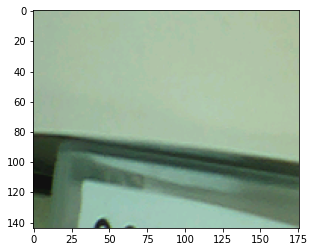

In [ ]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()